In [13]:
# Standard imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from typing import TYPE_CHECKING

if TYPE_CHECKING:
    pass

# Reproducibility
np.random.seed(42)

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (14, 5)
plt.rcParams['font.size'] = 11

print("✓ Libraries imported successfully")
print(f"  NumPy version: {np.__version__}")

✓ Libraries imported successfully
  NumPy version: 2.3.5


---

## Question 1: Bayesian Posterior Mode for Poisson Distribution

**Problem:** Suppose that the number of buses reaching a particular stop in a one-hour time period follows the Poisson distribution with an unknown parameter λ. Previous records suggest that the prior probabilities of λ are $P(\lambda = 8) = 0.3$ and $P(\lambda = 10) = 0.7$. If in a particular one-hour time period 9 buses reach the bus stop, find the posterior mode of λ.

---

In [14]:
# Question 1: Solution
print("Question 1: Bayesian Posterior Mode for Poisson Distribution")
print("=" * 70)

# Given
lambda_vals = [8, 10]
prior_probs = [0.3, 0.7]
observed_x = 9

print(f"\nGiven:")
print(f"  Prior: P(λ=8) = {prior_probs[0]}, P(λ=10) = {prior_probs[1]}")
print(f"  Observed: X = {observed_x} buses")

# Step 1: Calculate likelihoods P(X=9 | λ)
print("\nStep 1: Calculate Likelihoods P(X=9|λ)")
print("-" * 70)
likelihoods = [stats.poisson.pmf(observed_x, lam) for lam in lambda_vals]
for lam, lik in zip(lambda_vals, likelihoods):
    print(f"  P(X=9|λ={lam}) = {lik:.6f}")

# Step 2: Calculate joint probabilities
print("\nStep 2: Calculate Joint Probabilities")
print("-" * 70)
joint_probs = [lik * prior for lik, prior in zip(likelihoods, prior_probs)]
for lam, joint in zip(lambda_vals, joint_probs):
    print(f"  P(X=9, λ={lam}) = {joint:.6f}")

# Step 3: Calculate marginal and posterior
marginal = sum(joint_probs)
posterior_probs = [j / marginal for j in joint_probs]

print(f"\nStep 3: Calculate Posterior Probabilities")
print("-" * 70)
print(f"  Marginal: P(X=9) = {marginal:.6f}")
for lam, post in zip(lambda_vals, posterior_probs):
    marker = " ← MODE" if post == max(posterior_probs) else ""
    print(f"  P(λ={lam}|X=9) = {post:.4f}{marker}")

# Posterior mode
mode_index = np.argmax(posterior_probs)
posterior_mode = lambda_vals[mode_index]

print("\n" + "=" * 70)
print(f"✓ ANSWER: Posterior Mode = λ = {posterior_mode}")
print("=" * 70)

Question 1: Bayesian Posterior Mode for Poisson Distribution

Given:
  Prior: P(λ=8) = 0.3, P(λ=10) = 0.7
  Observed: X = 9 buses

Step 1: Calculate Likelihoods P(X=9|λ)
----------------------------------------------------------------------
  P(X=9|λ=8) = 0.124077
  P(X=9|λ=10) = 0.125110

Step 2: Calculate Joint Probabilities
----------------------------------------------------------------------
  P(X=9, λ=8) = 0.037223
  P(X=9, λ=10) = 0.087577

Step 3: Calculate Posterior Probabilities
----------------------------------------------------------------------
  Marginal: P(X=9) = 0.124800
  P(λ=8|X=9) = 0.2983
  P(λ=10|X=9) = 0.7017 ← MODE

✓ ANSWER: Posterior Mode = λ = 10


### Answer: $\boxed{\lambda = 10}$

**Summary:**
- Prior favored λ=10 (70% vs 30%)
- Likelihood P(X=9|λ=10) ≈ P(X=9|λ=8) (both around 0.125)
- Posterior: P(λ=10|X=9) ≈ 0.702, P(λ=8|X=9) ≈ 0.298
- **Mode: λ = 10** (highest posterior probability)

---

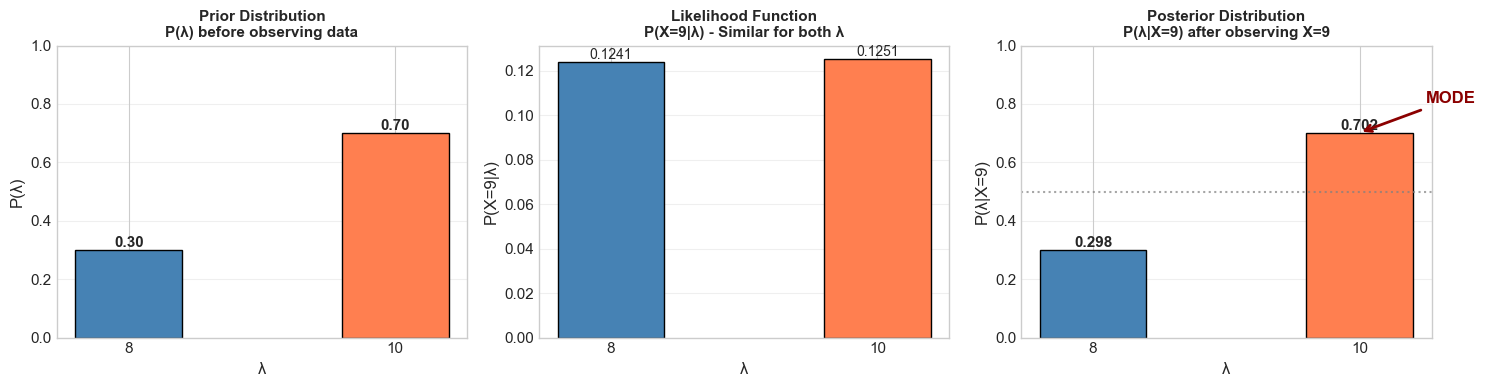


📊 Key Insights:
   • Prior favored λ=10 (70% vs 30%)
   • Likelihoods are similar (both around 0.125)
   • Posterior still favors λ=10 → MODE = 10


In [15]:
# Visualization: Q1 - Bayesian Posterior for Poisson Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Data from Q1
lambda_vals = [8, 10]
prior_probs = [0.3, 0.7]
observed_x = 9

# Calculate probabilities
likelihoods = [stats.poisson.pmf(observed_x, lam) for lam in lambda_vals]
joint_probs = [lik * prior for lik, prior in zip(likelihoods, prior_probs)]
marginal = sum(joint_probs)
posterior_probs = [j / marginal for j in joint_probs]

# Plot 1: Prior Distribution
colors = ['steelblue', 'coral']
bars1 = axes[0].bar(lambda_vals, prior_probs, color=colors, edgecolor='black', width=0.8)
axes[0].bar_label(bars1, fmt='%.2f', fontsize=11, fontweight='bold')
axes[0].set_xlabel('λ', fontsize=12)
axes[0].set_ylabel('P(λ)', fontsize=12)
axes[0].set_title('Prior Distribution\nP(λ) before observing data', fontsize=11, fontweight='bold')
axes[0].set_xticks(lambda_vals)
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Likelihood P(X=9|λ)
bars2 = axes[1].bar(lambda_vals, likelihoods, color=colors, edgecolor='black', width=0.8)
axes[1].bar_label(bars2, fmt='%.4f', fontsize=10)
axes[1].set_xlabel('λ', fontsize=12)
axes[1].set_ylabel('P(X=9|λ)', fontsize=12)
axes[1].set_title('Likelihood Function\nP(X=9|λ) - Similar for both λ', fontsize=11, fontweight='bold')
axes[1].set_xticks(lambda_vals)
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Posterior Distribution (with MODE highlighted)
bars3 = axes[2].bar(lambda_vals, posterior_probs, color=colors, edgecolor='black', width=0.8)
axes[2].bar_label(bars3, fmt='%.3f', fontsize=11, fontweight='bold')
axes[2].axhline(y=0.5, color='gray', linestyle=':', alpha=0.7)
# Highlight the mode
mode_idx = np.argmax(posterior_probs)
axes[2].annotate('MODE', xy=(lambda_vals[mode_idx], posterior_probs[mode_idx]), 
                xytext=(lambda_vals[mode_idx]+0.5, posterior_probs[mode_idx]+0.1),
                fontsize=12, fontweight='bold', color='darkred',
                arrowprops=dict(arrowstyle='->', color='darkred', lw=2))
axes[2].set_xlabel('λ', fontsize=12)
axes[2].set_ylabel('P(λ|X=9)', fontsize=12)
axes[2].set_title('Posterior Distribution\nP(λ|X=9) after observing X=9', fontsize=11, fontweight='bold')
axes[2].set_xticks(lambda_vals)
axes[2].set_ylim([0, 1])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("   • Prior favored λ=10 (70% vs 30%)")
print("   • Likelihoods are similar (both around 0.125)")
print("   • Posterior still favors λ=10 → MODE = 10")

---

## Question 2: Normal-Normal Conjugate Prior (Single Observation)

**Problem:** A random variable X follows a Normal distribution with known variance σ² = 4 and unknown mean μ. The prior distribution for μ is Normal with mean μ₀ = 10 and variance τ² = 9.

If a single observation x = 14 is obtained, find the posterior mean of μ.

**Formula:**
$$\mu_{posterior} = \frac{\tau^2}{\tau^2 + \sigma^2/n} \cdot \bar{x} + \frac{\sigma^2/n}{\tau^2 + \sigma^2/n} \cdot \mu_0$$

---

In [16]:
# Question 2: Solution
print("Question 2: Normal-Normal Conjugate Prior (Single Observation)")
print("=" * 70)

# Given parameters
sigma_sq = 4          # Known variance
tau_sq = 9            # Prior variance
mu_0 = 10             # Prior mean
x_obs = 14            # Observed value
n = 1                 # Number of observations

print(f"\nGiven:")
print(f"  Data: X ~ N(μ, σ²={sigma_sq})")
print(f"  Prior: μ ~ N(μ₀={mu_0}, τ²={tau_sq})")
print(f"  Observation: x = {x_obs}")

# Calculate weights
sigma_sq_over_n = sigma_sq / n
denominator = tau_sq + sigma_sq_over_n
weight_data = tau_sq / denominator
weight_prior = sigma_sq_over_n / denominator

print(f"\nStep 1: Calculate Weights")
print("-" * 70)
print(f"  w_data = τ²/(τ² + σ²/n) = {tau_sq}/{denominator} = {weight_data:.4f}")
print(f"  w_prior = (σ²/n)/(τ² + σ²/n) = {sigma_sq_over_n}/{denominator} = {weight_prior:.4f}")

# Calculate posterior mean
mu_posterior = weight_data * x_obs + weight_prior * mu_0

print(f"\nStep 2: Calculate Posterior Mean")
print("-" * 70)
print(f"  μ_post = w_data × x + w_prior × μ₀")
print(f"        = {weight_data:.4f} × {x_obs} + {weight_prior:.4f} × {mu_0}")
print(f"        = {weight_data * x_obs:.4f} + {weight_prior * mu_0:.4f}")
print(f"        = {mu_posterior:.4f}")

print("\n" + "=" * 70)
print(f"✓ ANSWER: Posterior Mean = {mu_posterior:.2f}")
print("=" * 70)

Question 2: Normal-Normal Conjugate Prior (Single Observation)

Given:
  Data: X ~ N(μ, σ²=4)
  Prior: μ ~ N(μ₀=10, τ²=9)
  Observation: x = 14

Step 1: Calculate Weights
----------------------------------------------------------------------
  w_data = τ²/(τ² + σ²/n) = 9/13.0 = 0.6923
  w_prior = (σ²/n)/(τ² + σ²/n) = 4.0/13.0 = 0.3077

Step 2: Calculate Posterior Mean
----------------------------------------------------------------------
  μ_post = w_data × x + w_prior × μ₀
        = 0.6923 × 14 + 0.3077 × 10
        = 9.6923 + 3.0769
        = 12.7692

✓ ANSWER: Posterior Mean = 12.77


### Answer: $\boxed{\mu_{posterior} = 12.77}$

**Summary:**
- Prior mean: μ₀ = 10
- Observed data: x = 14
- Data weight: 69.2% (larger prior variance → more weight on data)
- Prior weight: 30.8%
- **Posterior mean: 12.77** (weighted average between 10 and 14)

---

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/176239168.py:71: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/176239168.py:71: UserWarning: Glyph 8321 (\N{SUBSCRIPT ONE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/176239168.py:71: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/176239168.py:71: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/py

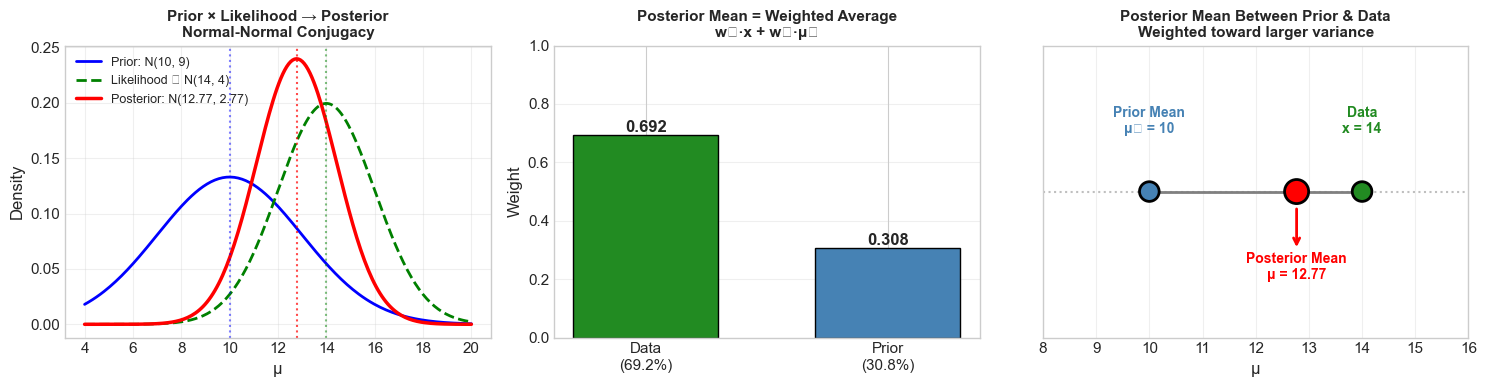


📊 Key Insights:
   • Prior variance τ² = 9 > Data variance σ² = 4
   • More weight on DATA (69.2%) because prior is less certain
   • Posterior mean (12.77) pulled toward observed x = 14


In [17]:
# Visualization: Q2 - Normal-Normal Conjugate Prior (Single Observation)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Parameters from Q2
sigma_sq_viz = 4    # Known variance
tau_sq_viz = 9      # Prior variance
mu_0_viz = 10       # Prior mean
x_obs_viz = 14      # Observed value
n_viz = 1

# Calculate posterior
sigma_sq_over_n_viz = sigma_sq_viz / n_viz
denom = tau_sq_viz + sigma_sq_over_n_viz
weight_data_viz = tau_sq_viz / denom
weight_prior_viz = sigma_sq_over_n_viz / denom
mu_post_viz = weight_data_viz * x_obs_viz + weight_prior_viz * mu_0_viz
tau_sq_post = 1 / (1/tau_sq_viz + n_viz/sigma_sq_viz)  # Posterior variance

# Plot 1: Prior, Likelihood, and Posterior
mu_range = np.linspace(4, 20, 200)
prior_pdf = stats.norm.pdf(mu_range, mu_0_viz, np.sqrt(tau_sq_viz))
likelihood_pdf = stats.norm.pdf(mu_range, x_obs_viz, np.sqrt(sigma_sq_viz))  # Likelihood centered at x
posterior_pdf = stats.norm.pdf(mu_range, mu_post_viz, np.sqrt(tau_sq_post))

axes[0].plot(mu_range, prior_pdf, 'b-', linewidth=2, label=f'Prior: N({mu_0_viz}, {tau_sq_viz})')
axes[0].plot(mu_range, likelihood_pdf, 'g--', linewidth=2, label=f'Likelihood ∝ N({x_obs_viz}, {sigma_sq_viz})')
axes[0].plot(mu_range, posterior_pdf, 'r-', linewidth=2.5, label=f'Posterior: N({mu_post_viz:.2f}, {tau_sq_post:.2f})')
axes[0].axvline(x=mu_0_viz, color='blue', linestyle=':', alpha=0.5)
axes[0].axvline(x=x_obs_viz, color='green', linestyle=':', alpha=0.5)
axes[0].axvline(x=mu_post_viz, color='red', linestyle=':', alpha=0.7)
axes[0].set_xlabel('μ', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Prior × Likelihood → Posterior\nNormal-Normal Conjugacy', fontsize=11, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: Weight visualization (pie chart style bar)
weights = [weight_data_viz, weight_prior_viz]
labels = [f'Data\n({weight_data_viz:.1%})', f'Prior\n({weight_prior_viz:.1%})']
colors_pie = ['forestgreen', 'steelblue']
bars = axes[1].bar([0, 1], weights, color=colors_pie, edgecolor='black', width=0.6)
axes[1].bar_label(bars, fmt='%.3f', fontsize=12, fontweight='bold')
axes[1].set_xticks([0, 1])
axes[1].set_xticklabels(labels, fontsize=11)
axes[1].set_ylabel('Weight', fontsize=12)
axes[1].set_title('Posterior Mean = Weighted Average\nw₁·x + w₂·μ₀', fontsize=11, fontweight='bold')
axes[1].set_ylim([0, 1])
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Posterior mean as weighted average
positions = [mu_0_viz, x_obs_viz, mu_post_viz]
pos_labels = [f'Prior Mean\nμ₀ = {mu_0_viz}', f'Data\nx = {x_obs_viz}', f'Posterior Mean\nμ = {mu_post_viz:.2f}']
colors_pts = ['steelblue', 'forestgreen', 'red']
sizes = [200, 200, 300]

axes[2].scatter(positions, [0.5, 0.5, 0.5], c=colors_pts, s=sizes, zorder=5, edgecolor='black', linewidth=2)
axes[2].hlines(y=0.5, xmin=mu_0_viz, xmax=x_obs_viz, color='gray', linewidth=2, linestyle='-')
axes[2].annotate('', xy=(mu_post_viz, 0.3), xytext=(mu_post_viz, 0.45),
                arrowprops=dict(arrowstyle='->', color='red', lw=2))
for pos, lab, col in zip(positions, pos_labels, colors_pts):
    axes[2].annotate(lab, xy=(pos, 0.5), xytext=(pos, 0.7 if pos != mu_post_viz else 0.2),
                    fontsize=10, ha='center', fontweight='bold', color=col)
axes[2].set_xlim([8, 16])
axes[2].set_ylim([0, 1])
axes[2].set_xlabel('μ', fontsize=12)
axes[2].set_title('Posterior Mean Between Prior & Data\nWeighted toward larger variance', fontsize=11, fontweight='bold')
axes[2].set_yticks([])
axes[2].axhline(y=0.5, color='gray', linestyle=':', alpha=0.5)
axes[2].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("   • Prior variance τ² = 9 > Data variance σ² = 4")
print("   • More weight on DATA (69.2%) because prior is less certain")
print("   • Posterior mean (12.77) pulled toward observed x = 14")

---

## Question 3: Exponential-Gamma Conjugate Prior

**Problem:** Let $X_1, X_2, \ldots, X_n \sim$ i.i.d. $\text{Exp}(\lambda)$, where $\lambda$ is an unknown parameter. Find the posterior mean of $\lambda$ assuming the prior distribution of $\lambda$ to be $\text{Exp}(\mu)$.

**Options:**
1. $\frac{n+1}{\mu + X_1 + X_2 + \ldots + X_n}$
2. $\frac{n}{\mu + X_1 + X_2 + \ldots + X_n}$
3. $\frac{n}{X_1 + X_2 + \ldots + X_n}$
4. $\frac{n+1}{X_1 + X_2 + \ldots + X_n}$

---

In [18]:
# Question 3: Solution
print("Question 3: Exponential-Gamma Conjugate Prior")
print("=" * 70)

print("\nTheoretical Derivation:")
print("-" * 70)
print("Prior: λ ~ Exp(μ) = Gamma(α₀=1, β₀=μ)")
print("Likelihood: X₁,...,Xₙ ~ i.i.d. Exp(λ)")
print("           L(λ|X) ∝ λⁿ exp(-λ Σxᵢ)")
print("")
print("Posterior: λ|X ~ Gamma(α₀ + n, β₀ + Σxᵢ)")
print("                = Gamma(1 + n, μ + Σxᵢ)")
print("")
print("Posterior Mean: E[λ|X] = α/β = (n + 1)/(μ + Σxᵢ)")

# Numerical example
print("\n" + "=" * 70)
print("Numerical Verification:")
print("-" * 70)

mu_prior = 2.0
n = 5
np.random.seed(42)
x_samples = np.random.exponential(scale=1/3.0, size=n)
sum_x = np.sum(x_samples)

print(f"Prior: λ ~ Exp(μ={mu_prior})")
print(f"Sample: n={n} observations, Σxᵢ = {sum_x:.4f}")

alpha_post = 1 + n
beta_post = mu_prior + sum_x
posterior_mean = alpha_post / beta_post

print(f"\nPosterior: Gamma({alpha_post}, {beta_post:.4f})")
print(f"E[λ|X] = (n+1)/(μ + Σxᵢ) = {alpha_post}/{beta_post:.4f} = {posterior_mean:.4f}")

print("\n" + "=" * 70)
print("✓ ANSWER: Option 1 - (n+1)/(μ + X₁ + X₂ + ... + Xₙ)")
print("=" * 70)

Question 3: Exponential-Gamma Conjugate Prior

Theoretical Derivation:
----------------------------------------------------------------------
Prior: λ ~ Exp(μ) = Gamma(α₀=1, β₀=μ)
Likelihood: X₁,...,Xₙ ~ i.i.d. Exp(λ)
           L(λ|X) ∝ λⁿ exp(-λ Σxᵢ)

Posterior: λ|X ~ Gamma(α₀ + n, β₀ + Σxᵢ)
                = Gamma(1 + n, μ + Σxᵢ)

Posterior Mean: E[λ|X] = α/β = (n + 1)/(μ + Σxᵢ)

Numerical Verification:
----------------------------------------------------------------------
Prior: λ ~ Exp(μ=2.0)
Sample: n=5 observations, Σxᵢ = 1.9596

Posterior: Gamma(6, 3.9596)
E[λ|X] = (n+1)/(μ + Σxᵢ) = 6/3.9596 = 1.5153

✓ ANSWER: Option 1 - (n+1)/(μ + X₁ + X₂ + ... + Xₙ)


### Answer: $\boxed{\frac{n+1}{\mu + X_1 + X_2 + \ldots + X_n}}$ (Option 1)

**Summary:**
- Exp(μ) = Gamma(1, μ), so α₀ = 1, β₀ = μ
- Posterior: Gamma(1 + n, μ + Σxᵢ)
- **Posterior mean = (n+1)/(μ + Σxᵢ)**

**Why other options are wrong:**
- Option 2: Missing +1 from prior (α₀ = 1)
- Option 3: Ignores prior completely (just MLE)
- Option 4: Ignores prior rate μ

---

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/710405960.py:72: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10003 (\N{CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


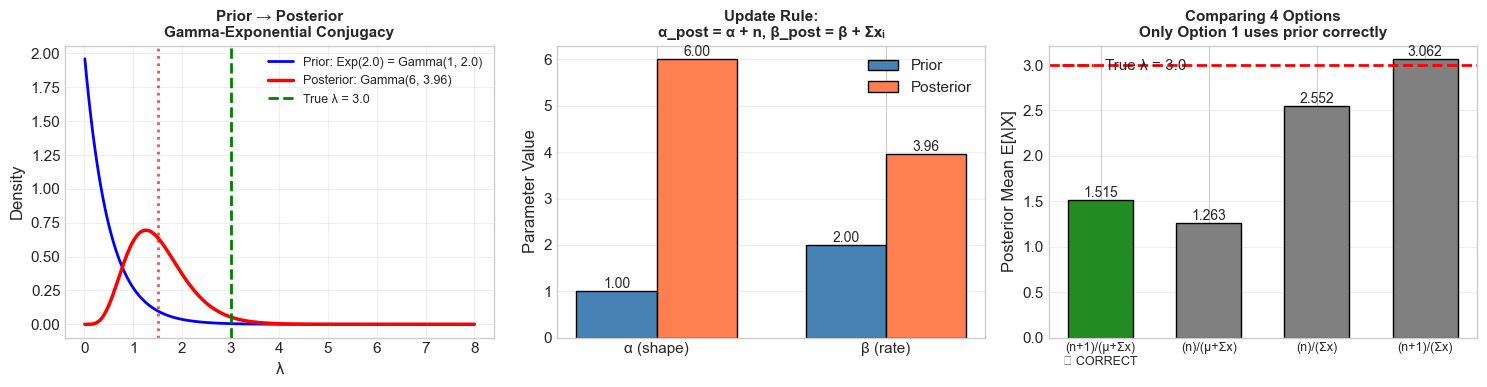


📊 Key Insights:
   • Prior: Exp(μ) = Gamma(1, μ) has α₀=1
   • Posterior: Gamma(1+n, μ+Σxᵢ) → Mean = (n+1)/(μ+Σxᵢ)
   • Option 1 correctly includes +1 from prior shape parameter


In [19]:
# Visualization: Q3 - Exponential-Gamma Conjugate Prior
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Parameters for example
mu_prior_q3 = 2.0   # Prior rate parameter
n_q3 = 5            # Sample size
np.random.seed(42)
x_samples_q3 = np.random.exponential(scale=1/3.0, size=n_q3)  # True λ=3
sum_x_q3 = np.sum(x_samples_q3)

# Prior: Exp(μ) = Gamma(1, μ)
alpha_prior = 1
beta_prior = mu_prior_q3

# Posterior: Gamma(α + n, β + Σxᵢ)
alpha_post_q3 = alpha_prior + n_q3
beta_post_q3 = beta_prior + sum_x_q3

# Plot 1: Prior, Posterior, and True λ
lambda_range = np.linspace(0.01, 8, 200)
prior_pdf = stats.gamma.pdf(lambda_range, a=alpha_prior, scale=1/beta_prior)
posterior_pdf = stats.gamma.pdf(lambda_range, a=alpha_post_q3, scale=1/beta_post_q3)

axes[0].plot(lambda_range, prior_pdf, 'b-', linewidth=2, label=f'Prior: Exp({mu_prior_q3}) = Gamma(1, {mu_prior_q3})')
axes[0].plot(lambda_range, posterior_pdf, 'r-', linewidth=2.5, label=f'Posterior: Gamma({alpha_post_q3}, {beta_post_q3:.2f})')
axes[0].axvline(x=3.0, color='green', linestyle='--', linewidth=2, label='True λ = 3.0')
axes[0].axvline(x=alpha_post_q3/beta_post_q3, color='red', linestyle=':', linewidth=2, alpha=0.7)
axes[0].set_xlabel('λ', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Prior → Posterior\nGamma-Exponential Conjugacy', fontsize=11, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: Prior vs Posterior parameters
param_names = ['α (shape)', 'β (rate)']
prior_params = [alpha_prior, beta_prior]
posterior_params = [alpha_post_q3, beta_post_q3]

x_pos = np.arange(len(param_names))
width = 0.35
bars1 = axes[1].bar(x_pos - width/2, prior_params, width, label='Prior', color='steelblue', edgecolor='black')
bars2 = axes[1].bar(x_pos + width/2, posterior_params, width, label='Posterior', color='coral', edgecolor='black')
axes[1].bar_label(bars1, fmt='%.2f', fontsize=10)
axes[1].bar_label(bars2, fmt='%.2f', fontsize=10)
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(param_names, fontsize=11)
axes[1].set_ylabel('Parameter Value', fontsize=12)
axes[1].set_title('Update Rule:\nα_post = α + n, β_post = β + Σxᵢ', fontsize=11, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Comparing the 4 options from the question
options_means = [
    (n_q3 + 1) / (mu_prior_q3 + sum_x_q3),  # Option 1 (correct)
    n_q3 / (mu_prior_q3 + sum_x_q3),         # Option 2
    n_q3 / sum_x_q3,                          # Option 3
    (n_q3 + 1) / sum_x_q3                     # Option 4
]
option_labels = ['(n+1)/(μ+Σx)\n✓ CORRECT', '(n)/(μ+Σx)', '(n)/(Σx)', '(n+1)/(Σx)']
colors_opts = ['forestgreen', 'gray', 'gray', 'gray']

bars3 = axes[2].bar(range(1, 5), options_means, color=colors_opts, edgecolor='black', width=0.6)
axes[2].bar_label(bars3, fmt='%.3f', fontsize=10)
axes[2].axhline(y=3.0, color='red', linestyle='--', linewidth=2, label='True λ = 3.0')
axes[2].set_xticks(range(1, 5))
axes[2].set_xticklabels(option_labels, fontsize=9)
axes[2].set_ylabel('Posterior Mean E[λ|X]', fontsize=12)
axes[2].set_title('Comparing 4 Options\nOnly Option 1 uses prior correctly', fontsize=11, fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"   • Prior: Exp(μ) = Gamma(1, μ) has α₀=1")
print(f"   • Posterior: Gamma(1+n, μ+Σxᵢ) → Mean = (n+1)/(μ+Σxᵢ)")
print(f"   • Option 1 correctly includes +1 from prior shape parameter")

---

## Question 4: Beta-Binomial Conjugate Prior

**Problem:** Three out of the last ten candidates wins a treasure hunt game. Previous record shows fraction of winners follows the $\text{Beta}(70.0, b)$ distribution with an average of 70.0%. Estimate the long-term fraction of winners of the treasure hunt game. Write your answer correct to two decimal places.

**Given:**
- Prior: $p \sim \text{Beta}(a=70, b)$ with mean 0.70
- Observed: 3 successes out of 10 trials

---

In [20]:
# Question 4: Solution
print("Question 4: Beta-Binomial Conjugate Prior (Treasure Hunt)")
print("=" * 70)

# Given
a_given = 70.0
prior_mean = 0.70
n_trials = 10
x_successes = 3

print(f"\nGiven:")
print(f"  Prior: p ~ Beta(a={a_given}, b=?)")
print(f"  Prior mean: E[p] = {prior_mean} (70%)")
print(f"  Observed: {x_successes} wins out of {n_trials} games")

# Step 1: Find b from prior mean
print(f"\nStep 1: Find b from prior mean")
print("-" * 70)
print(f"  E[p] = a/(a+b) = {prior_mean}")
print(f"  {a_given}/({a_given}+b) = {prior_mean}")
b_prior = (a_given - prior_mean * a_given) / prior_mean
print(f"  b = {b_prior:.0f}")

# Step 2: Beta-Binomial update
print(f"\nStep 2: Apply Beta-Binomial Conjugacy")
print("-" * 70)
alpha_post = a_given + x_successes
beta_post = b_prior + (n_trials - x_successes)
print(f"  α_post = a + x = {a_given} + {x_successes} = {alpha_post}")
print(f"  β_post = b + (n-x) = {b_prior} + {n_trials - x_successes} = {beta_post}")

# Step 3: Posterior mean
posterior_mean_p = alpha_post / (alpha_post + beta_post)
print(f"\nStep 3: Calculate Posterior Mean")
print("-" * 70)
print(f"  E[p|X] = α/(α+β) = {alpha_post}/{alpha_post + beta_post} = {posterior_mean_p:.4f}")

print("\n" + "=" * 70)
print(f"✓ ANSWER: Long-term fraction = {posterior_mean_p:.2f}")
print("=" * 70)

Question 4: Beta-Binomial Conjugate Prior (Treasure Hunt)

Given:
  Prior: p ~ Beta(a=70.0, b=?)
  Prior mean: E[p] = 0.7 (70%)
  Observed: 3 wins out of 10 games

Step 1: Find b from prior mean
----------------------------------------------------------------------
  E[p] = a/(a+b) = 0.7
  70.0/(70.0+b) = 0.7
  b = 30

Step 2: Apply Beta-Binomial Conjugacy
----------------------------------------------------------------------
  α_post = a + x = 70.0 + 3 = 73.0
  β_post = b + (n-x) = 30.000000000000004 + 7 = 37.0

Step 3: Calculate Posterior Mean
----------------------------------------------------------------------
  E[p|X] = α/(α+β) = 73.0/110.0 = 0.6636

✓ ANSWER: Long-term fraction = 0.66


### Answer: $\boxed{0.66}$

**Summary:**
- From E[p] = a/(a+b) = 0.70 with a = 70, we get b = 30
- Prior: Beta(70, 30) → 100 "historical games": 70 wins, 30 losses
- Data: 3 wins, 7 losses (10 games)
- Posterior: Beta(73, 37) → 110 total games: 73 wins, 37 losses
- **Posterior mean = 73/110 = 0.66**

---

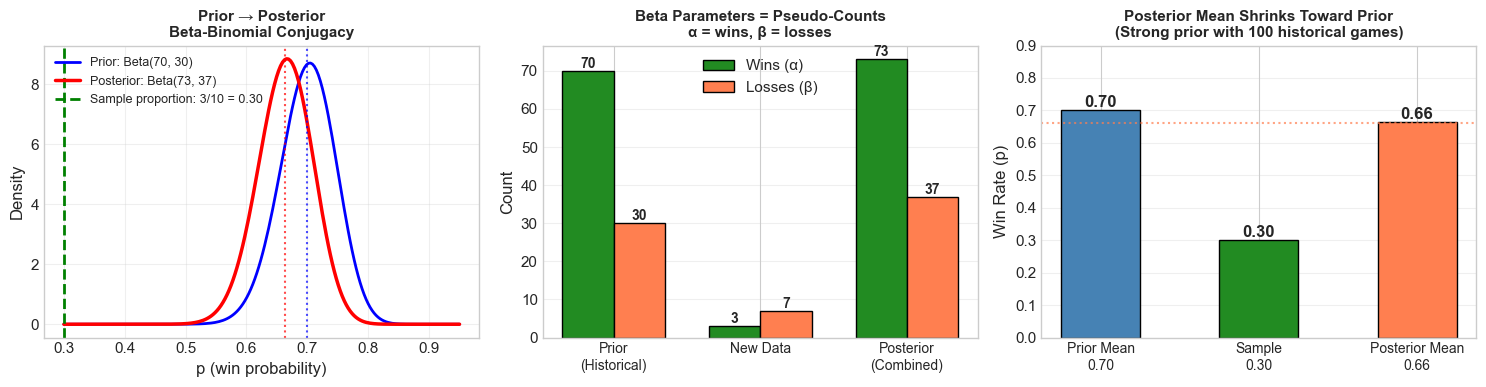


📊 Key Insights:
   • Prior: Beta(70, 30) ≈ 100 historical games, 70% win rate
   • Data: 3 wins out of 10 (30% win rate)
   • Posterior: Beta(73, 37) → Mean = 73/110 = 0.66
   • Strong prior (100 games) dominates weak data (10 games)


In [22]:
# Visualization: Q4 - Beta-Binomial Conjugate Prior (Treasure Hunt)
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Parameters from Q4
a_prior = 70.0
b_prior_q4 = 30.0  # From E[p] = 0.70 = 70/(70+b) → b = 30
n_trials_q4 = 10
x_successes_q4 = 3

# Posterior parameters
a_post = a_prior + x_successes_q4  # 73
b_post = b_prior_q4 + (n_trials_q4 - x_successes_q4)  # 37

# Plot 1: Prior and Posterior PDFs
p_range = np.linspace(0.3, 0.95, 200)
prior_pdf_q4 = stats.beta.pdf(p_range, a_prior, b_prior_q4)
posterior_pdf_q4 = stats.beta.pdf(p_range, a_post, b_post)

axes[0].plot(p_range, prior_pdf_q4, 'b-', linewidth=2, label=f'Prior: Beta({a_prior:.0f}, {b_prior_q4:.0f})')
axes[0].plot(p_range, posterior_pdf_q4, 'r-', linewidth=2.5, label=f'Posterior: Beta({a_post:.0f}, {b_post:.0f})')
axes[0].axvline(x=a_prior/(a_prior+b_prior_q4), color='blue', linestyle=':', alpha=0.7)
axes[0].axvline(x=a_post/(a_post+b_post), color='red', linestyle=':', alpha=0.7)
axes[0].axvline(x=x_successes_q4/n_trials_q4, color='green', linestyle='--', linewidth=2, 
                label=f'Sample proportion: {x_successes_q4}/{n_trials_q4} = 0.30')
axes[0].set_xlabel('p (win probability)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Prior → Posterior\nBeta-Binomial Conjugacy', fontsize=11, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: "Pseudo-counts" interpretation
categories = ['Prior\n(Historical)', 'New Data', 'Posterior\n(Combined)']
wins = [a_prior, x_successes_q4, a_post]
losses = [b_prior_q4, n_trials_q4 - x_successes_q4, b_post]

x_pos = np.arange(len(categories))
width = 0.35
bars_wins = axes[1].bar(x_pos - width/2, wins, width, label='Wins (α)', color='forestgreen', edgecolor='black')
bars_losses = axes[1].bar(x_pos + width/2, losses, width, label='Losses (β)', color='coral', edgecolor='black')
axes[1].bar_label(bars_wins, fmt='%.0f', fontsize=10, fontweight='bold')
axes[1].bar_label(bars_losses, fmt='%.0f', fontsize=10, fontweight='bold')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(categories, fontsize=10)
axes[1].set_ylabel('Count', fontsize=12)
axes[1].set_title('Beta Parameters = Pseudo-Counts\nα = wins, β = losses', fontsize=11, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

# Plot 3: Win rates comparison
rates = [a_prior/(a_prior+b_prior_q4), x_successes_q4/n_trials_q4, a_post/(a_post+b_post)]
rate_labels = [f'Prior Mean\n{rates[0]:.2f}', f'Sample\n{rates[1]:.2f}', f'Posterior Mean\n{rates[2]:.2f}']
colors_rate = ['steelblue', 'forestgreen', 'coral']

bars3 = axes[2].bar(range(3), rates, color=colors_rate, edgecolor='black', width=0.5)
axes[2].bar_label(bars3, fmt='%.2f', fontsize=12, fontweight='bold')
axes[2].set_xticks(range(3))
axes[2].set_xticklabels(rate_labels, fontsize=10)
axes[2].set_ylabel('Win Rate (p)', fontsize=12)
axes[2].set_title('Posterior Mean Shrinks Toward Prior\n(Strong prior with 100 historical games)', fontsize=11, fontweight='bold')
axes[2].axhline(y=0.66, color='coral', linestyle=':', alpha=0.7)
axes[2].set_ylim([0, 0.9])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"   • Prior: Beta(70, 30) ≈ 100 historical games, 70% win rate")
print(f"   • Data: 3 wins out of 10 (30% win rate)")
print(f"   • Posterior: Beta(73, 37) → Mean = 73/110 = 0.66")
print(f"   • Strong prior (100 games) dominates weak data (10 games)")

---

## Question 5: Normal-Normal Conjugate Prior (Rainfall Data)

**Problem:** Rainfall in the monsoon season in Delhi follows normal distribution with mean μ and variance 256. Rainfall (in mm) registered in the 2021 monsoon are: 228, 414, 486, 534, 428, 659, 655, 733, 333, 900.

Prior information about the average rainfall is that it has mean 700 mm and variance 289.

Use the normal prior that matches your prior information and find the posterior mean. Write your answer correct to two decimal places.

**Given:**
- Likelihood: $X_i \sim N(\mu, \sigma^2=256)$
- Prior: $\mu \sim N(\mu_0=700, \tau^2=289)$
- Data: n = 10 observations

---

In [21]:
# Question 5: Solution
print("Question 5: Normal-Normal Conjugate Prior (Rainfall Data)")
print("=" * 70)

# Given data
rainfall_data = np.array([228, 414, 486, 534, 428, 659, 655, 733, 333, 900])
sigma_sq = 256  # Known variance
mu_0 = 700      # Prior mean
tau_sq = 289    # Prior variance
n = len(rainfall_data)
x_bar = np.mean(rainfall_data)

print(f"\nGiven:")
print(f"  Data: {rainfall_data.tolist()}")
print(f"  n = {n}, σ² = {sigma_sq}")
print(f"  Prior: μ ~ N({mu_0}, {tau_sq})")
print(f"  Sample mean: x̄ = {x_bar:.2f} mm")

# Calculate weights
sigma_sq_over_n = sigma_sq / n
denominator = tau_sq + sigma_sq_over_n
weight_data = tau_sq / denominator
weight_prior = sigma_sq_over_n / denominator

print(f"\nStep 1: Calculate Weights")
print("-" * 70)
print(f"  σ²/n = {sigma_sq}/{n} = {sigma_sq_over_n:.2f}")
print(f"  w_data = τ²/(τ² + σ²/n) = {tau_sq}/{denominator:.2f} = {weight_data:.4f} ({weight_data:.1%})")
print(f"  w_prior = (σ²/n)/(τ² + σ²/n) = {sigma_sq_over_n:.2f}/{denominator:.2f} = {weight_prior:.4f} ({weight_prior:.1%})")

# Calculate posterior mean
mu_posterior = weight_data * x_bar + weight_prior * mu_0

print(f"\nStep 2: Calculate Posterior Mean")
print("-" * 70)
print(f"  μ_post = w_data × x̄ + w_prior × μ₀")
print(f"        = {weight_data:.4f} × {x_bar:.2f} + {weight_prior:.4f} × {mu_0}")
print(f"        = {weight_data * x_bar:.2f} + {weight_prior * mu_0:.2f}")
print(f"        = {mu_posterior:.2f} mm")

print("\n" + "=" * 70)
print(f"✓ ANSWER: Posterior Mean = {mu_posterior:.2f} mm")
print("=" * 70)

Question 5: Normal-Normal Conjugate Prior (Rainfall Data)

Given:
  Data: [228, 414, 486, 534, 428, 659, 655, 733, 333, 900]
  n = 10, σ² = 256
  Prior: μ ~ N(700, 289)
  Sample mean: x̄ = 537.00 mm

Step 1: Calculate Weights
----------------------------------------------------------------------
  σ²/n = 256/10 = 25.60
  w_data = τ²/(τ² + σ²/n) = 289/314.60 = 0.9186 (91.9%)
  w_prior = (σ²/n)/(τ² + σ²/n) = 25.60/314.60 = 0.0814 (8.1%)

Step 2: Calculate Posterior Mean
----------------------------------------------------------------------
  μ_post = w_data × x̄ + w_prior × μ₀
        = 0.9186 × 537.00 + 0.0814 × 700
        = 493.30 + 56.96
        = 550.26 mm

✓ ANSWER: Posterior Mean = 550.26 mm


### Answer: $\boxed{550.26}$ mm

**Summary:**
- Sample mean: x̄ = 537.0 mm
- Prior mean: μ₀ = 700 mm
- Data weight: 91.9% (prior variance 289 >> data variance 25.6)
- Prior weight: 8.1%
- **Posterior mean = 0.9186 × 537 + 0.0814 × 700 = 550.26 mm**

Data dominates because σ²/n = 25.6 is much smaller than τ² = 289 (data is more precise).

---

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/2577267825.py:86: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/2577267825.py:86: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8320 (\N{SUBSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8733 (\N{PROPORTIONAL TO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


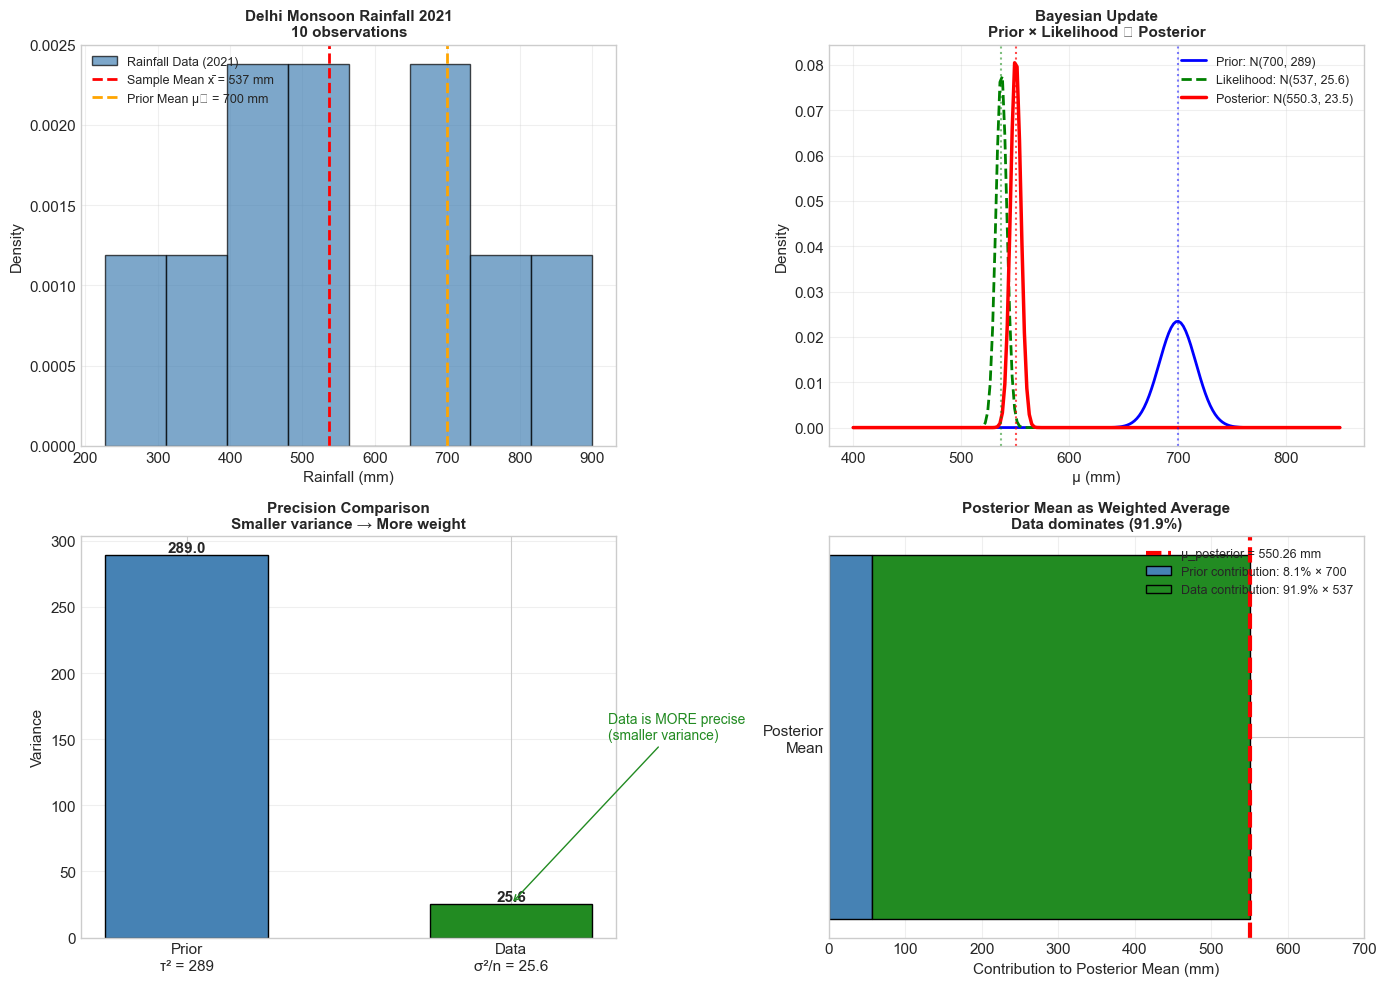


📊 Key Insights:
   • Sample mean x̄ = 537 mm is lower than prior μ₀ = 700 mm
   • Data variance σ²/n = 25.6 << Prior variance τ² = 289
   • Data is more precise → gets 91.9% weight
   • Posterior mean 550.26 mm is close to sample mean


In [23]:
# Visualization: Q5 - Normal-Normal Conjugate Prior (Rainfall Data)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Data from Q5
rainfall_data_viz = np.array([228, 414, 486, 534, 428, 659, 655, 733, 333, 900])
sigma_sq_q5 = 256   # Known variance
mu_0_q5 = 700       # Prior mean
tau_sq_q5 = 289     # Prior variance
n_q5 = len(rainfall_data_viz)
x_bar_q5 = np.mean(rainfall_data_viz)

# Calculate posterior
sigma_sq_over_n_q5 = sigma_sq_q5 / n_q5
denom_q5 = tau_sq_q5 + sigma_sq_over_n_q5
weight_data_q5 = tau_sq_q5 / denom_q5
weight_prior_q5 = sigma_sq_over_n_q5 / denom_q5
mu_post_q5 = weight_data_q5 * x_bar_q5 + weight_prior_q5 * mu_0_q5
tau_sq_post_q5 = 1 / (1/tau_sq_q5 + n_q5/sigma_sq_q5)

# Plot 1: Rainfall data histogram
axes[0, 0].hist(rainfall_data_viz, bins=8, density=True, alpha=0.7, color='steelblue', 
                edgecolor='black', label='Rainfall Data (2021)')
axes[0, 0].axvline(x=x_bar_q5, color='red', linestyle='--', linewidth=2, 
                   label=f'Sample Mean x̄ = {x_bar_q5:.0f} mm')
axes[0, 0].axvline(x=mu_0_q5, color='orange', linestyle='--', linewidth=2, 
                   label=f'Prior Mean μ₀ = {mu_0_q5} mm')
axes[0, 0].set_xlabel('Rainfall (mm)', fontsize=11)
axes[0, 0].set_ylabel('Density', fontsize=11)
axes[0, 0].set_title('Delhi Monsoon Rainfall 2021\n10 observations', fontsize=11, fontweight='bold')
axes[0, 0].legend(fontsize=9)
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: Prior, Likelihood, Posterior
mu_range_q5 = np.linspace(400, 850, 200)
prior_pdf_q5 = stats.norm.pdf(mu_range_q5, mu_0_q5, np.sqrt(tau_sq_q5))
likelihood_pdf_q5 = stats.norm.pdf(mu_range_q5, x_bar_q5, np.sqrt(sigma_sq_q5/n_q5))
posterior_pdf_q5 = stats.norm.pdf(mu_range_q5, mu_post_q5, np.sqrt(tau_sq_post_q5))

axes[0, 1].plot(mu_range_q5, prior_pdf_q5, 'b-', linewidth=2, 
                label=f'Prior: N({mu_0_q5}, {tau_sq_q5})')
axes[0, 1].plot(mu_range_q5, likelihood_pdf_q5, 'g--', linewidth=2, 
                label=f'Likelihood: N({x_bar_q5:.0f}, {sigma_sq_q5/n_q5:.1f})')
axes[0, 1].plot(mu_range_q5, posterior_pdf_q5, 'r-', linewidth=2.5, 
                label=f'Posterior: N({mu_post_q5:.1f}, {tau_sq_post_q5:.1f})')
axes[0, 1].axvline(x=mu_0_q5, color='blue', linestyle=':', alpha=0.5)
axes[0, 1].axvline(x=x_bar_q5, color='green', linestyle=':', alpha=0.5)
axes[0, 1].axvline(x=mu_post_q5, color='red', linestyle=':', alpha=0.7)
axes[0, 1].set_xlabel('μ (mm)', fontsize=11)
axes[0, 1].set_ylabel('Density', fontsize=11)
axes[0, 1].set_title('Bayesian Update\nPrior × Likelihood ∝ Posterior', fontsize=11, fontweight='bold')
axes[0, 1].legend(fontsize=9)
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Variance comparison and weight calculation
variances = [tau_sq_q5, sigma_sq_q5/n_q5]
var_labels = [f'Prior\nτ² = {tau_sq_q5}', f'Data\nσ²/n = {sigma_sq_q5/n_q5:.1f}']
colors_var = ['steelblue', 'forestgreen']

bars_var = axes[1, 0].bar(range(2), variances, color=colors_var, edgecolor='black', width=0.5)
axes[1, 0].bar_label(bars_var, fmt='%.1f', fontsize=11, fontweight='bold')
axes[1, 0].set_xticks(range(2))
axes[1, 0].set_xticklabels(var_labels, fontsize=11)
axes[1, 0].set_ylabel('Variance', fontsize=11)
axes[1, 0].set_title('Precision Comparison\nSmaller variance → More weight', fontsize=11, fontweight='bold')
axes[1, 0].annotate(f'Data is MORE precise\n(smaller variance)', 
                   xy=(1, sigma_sq_q5/n_q5), xytext=(1.3, 150),
                   fontsize=10, color='forestgreen',
                   arrowprops=dict(arrowstyle='->', color='forestgreen'))
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Plot 4: Weights and posterior mean calculation
# Stacked bar showing the weighted average
axes[1, 1].barh(['Posterior\nMean'], [weight_prior_q5 * mu_0_q5], color='steelblue', 
                edgecolor='black', label=f'Prior contribution: {weight_prior_q5:.1%} × {mu_0_q5}')
axes[1, 1].barh(['Posterior\nMean'], [weight_data_q5 * x_bar_q5], left=[weight_prior_q5 * mu_0_q5], 
                color='forestgreen', edgecolor='black', 
                label=f'Data contribution: {weight_data_q5:.1%} × {x_bar_q5:.0f}')
axes[1, 1].axvline(x=mu_post_q5, color='red', linestyle='--', linewidth=3, 
                   label=f'μ_posterior = {mu_post_q5:.2f} mm')
axes[1, 1].set_xlabel('Contribution to Posterior Mean (mm)', fontsize=11)
axes[1, 1].set_xlim([0, 700])
axes[1, 1].set_title('Posterior Mean as Weighted Average\nData dominates (91.9%)', fontsize=11, fontweight='bold')
axes[1, 1].legend(fontsize=9, loc='upper right')
axes[1, 1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"   • Sample mean x̄ = {x_bar_q5:.0f} mm is lower than prior μ₀ = {mu_0_q5} mm")
print(f"   • Data variance σ²/n = {sigma_sq_q5/n_q5:.1f} << Prior variance τ² = {tau_sq_q5}")
print(f"   • Data is more precise → gets {weight_data_q5:.1%} weight")
print(f"   • Posterior mean {mu_post_q5:.2f} mm is close to sample mean")

---

## Question 6: Maximum Likelihood Estimation for Exponential Distribution

**Problem:** Suppose length of a phone call (in minutes) made by Kapil is **exponentially distributed** with an unknown parameter λ. Consider a sample (in minutes) **20, 23, 50, 2, 7, 10, 15, 70, 30, 29** from his previous call records.

Find the **maximum likelihood estimate** of λ for the given sample. Enter the answer correct to **three decimal places**.

**Theory:**
- For $X_1, \ldots, X_n \sim \text{Exp}(\lambda)$, the likelihood is:
$$L(\lambda) = \lambda^n e^{-\lambda \sum x_i}$$
- Log-likelihood: $\ell(\lambda) = n \ln(\lambda) - \lambda \sum x_i$
- Taking derivative and setting to zero: $\frac{d\ell}{d\lambda} = \frac{n}{\lambda} - \sum x_i = 0$
- **MLE: $\hat{\lambda}_{MLE} = \frac{n}{\sum x_i} = \frac{1}{\bar{x}}$**

---

In [24]:
# Question 6: Solution
print("Question 6: Maximum Likelihood Estimation for Exponential Distribution")
print("=" * 70)

# Given data
call_lengths = np.array([20, 23, 50, 2, 7, 10, 15, 70, 30, 29])
n = len(call_lengths)
sum_x = np.sum(call_lengths)
x_bar = np.mean(call_lengths)

print(f"\nGiven:")
print(f"  Sample: {call_lengths.tolist()}")
print(f"  n = {n} observations")
print(f"  Σxᵢ = {sum_x} minutes")
print(f"  x̄ = {x_bar} minutes")

# Step 1: Derive MLE
print(f"\nStep 1: MLE Derivation for Exponential Distribution")
print("-" * 70)
print("  Likelihood: L(λ) = λⁿ exp(-λ Σxᵢ)")
print("  Log-likelihood: ℓ(λ) = n·ln(λ) - λ·Σxᵢ")
print("  Score: dℓ/dλ = n/λ - Σxᵢ = 0")
print("  ⟹ λ̂_MLE = n / Σxᵢ = 1 / x̄")

# Step 2: Calculate MLE
print(f"\nStep 2: Calculate MLE")
print("-" * 70)
lambda_mle = n / sum_x
print(f"  λ̂_MLE = n / Σxᵢ = {n} / {sum_x} = {lambda_mle:.6f}")
print(f"  λ̂_MLE = 1 / x̄ = 1 / {x_bar} = {1/x_bar:.6f}")

# Verify it's a maximum (second derivative test)
print(f"\nStep 3: Verify Maximum (Second Derivative Test)")
print("-" * 70)
print(f"  d²ℓ/dλ² = -n/λ² < 0 for all λ > 0 ✓")
print(f"  This confirms λ̂_MLE is a maximum")

print("\n" + "=" * 70)
print(f"✓ ANSWER: λ̂_MLE = {lambda_mle:.3f}")
print("=" * 70)

Question 6: Maximum Likelihood Estimation for Exponential Distribution

Given:
  Sample: [20, 23, 50, 2, 7, 10, 15, 70, 30, 29]
  n = 10 observations
  Σxᵢ = 256 minutes
  x̄ = 25.6 minutes

Step 1: MLE Derivation for Exponential Distribution
----------------------------------------------------------------------
  Likelihood: L(λ) = λⁿ exp(-λ Σxᵢ)
  Log-likelihood: ℓ(λ) = n·ln(λ) - λ·Σxᵢ
  Score: dℓ/dλ = n/λ - Σxᵢ = 0
  ⟹ λ̂_MLE = n / Σxᵢ = 1 / x̄

Step 2: Calculate MLE
----------------------------------------------------------------------
  λ̂_MLE = n / Σxᵢ = 10 / 256 = 0.039062
  λ̂_MLE = 1 / x̄ = 1 / 25.6 = 0.039062

Step 3: Verify Maximum (Second Derivative Test)
----------------------------------------------------------------------
  d²ℓ/dλ² = -n/λ² < 0 for all λ > 0 ✓
  This confirms λ̂_MLE is a maximum

✓ ANSWER: λ̂_MLE = 0.039


### Answer: $\boxed{\hat{\lambda}_{MLE} = 0.039}$

**Summary:**
- Sample: 10 phone call lengths in minutes
- Total duration: Σxᵢ = 256 minutes
- Mean duration: x̄ = 25.6 minutes
- **MLE: λ̂ = n/Σxᵢ = 10/256 = 0.039**

**Interpretation:**
- λ = 0.039 calls per minute ≈ 2.3 calls per hour
- Expected call duration = 1/λ = 25.6 minutes (same as sample mean)

---

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/949641211.py:78: UserWarning: Glyph 8467 (\N{SCRIPT SMALL L}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/949641211.py:78: UserWarning: Glyph 10233 (\N{LONG RIGHTWARDS DOUBLE ARROW}) missing from font(s) DejaVu Sans Mono.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8467 (\N{SCRIPT SMALL L}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 10233 (\N{LONG RIGHTWARDS DOUBLE ARROW}) missing from font(s) DejaVu Sans Mono.
  fig.canvas.print_figure(bytes_io, **kw)


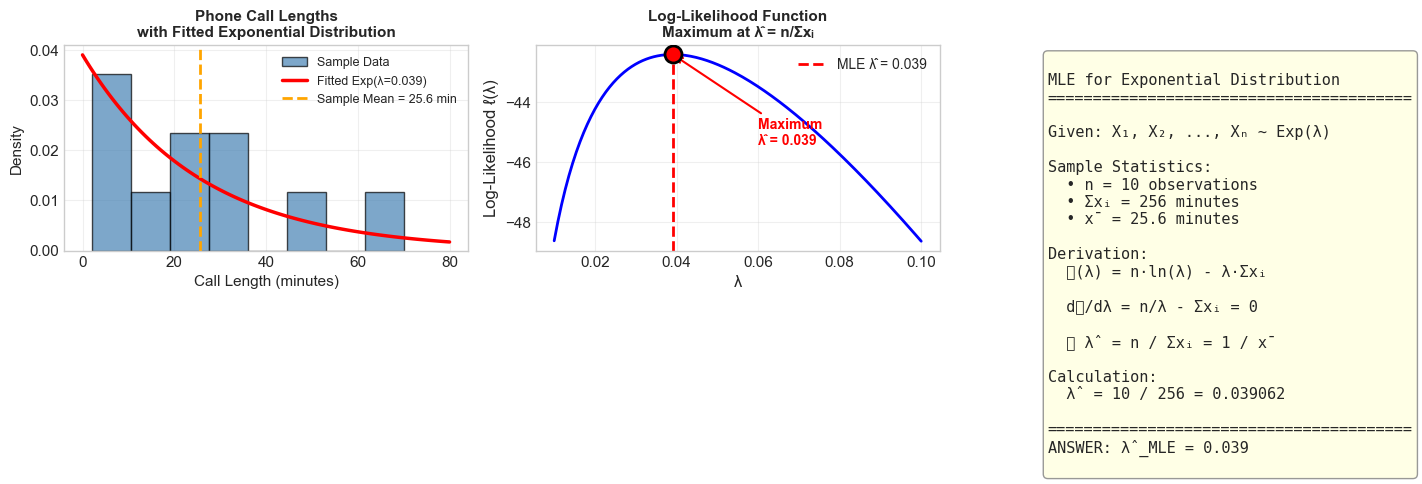


📊 Key Insights:
   • MLE for Exponential: λ̂ = n/Σxᵢ = 1/x̄
   • λ̂ = 10/256 = 0.039
   • Expected call length = 1/λ̂ = 25.6 minutes


In [25]:
# Visualization: Q6 - MLE for Exponential Distribution
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Data
call_lengths_viz = np.array([20, 23, 50, 2, 7, 10, 15, 70, 30, 29])
n_q6 = len(call_lengths_viz)
sum_x_q6 = np.sum(call_lengths_viz)
x_bar_q6 = np.mean(call_lengths_viz)
lambda_mle_q6 = n_q6 / sum_x_q6

# Plot 1: Histogram of call lengths with fitted exponential
axes[0].hist(call_lengths_viz, bins=8, density=True, alpha=0.7, color='steelblue', 
             edgecolor='black', label='Sample Data')
x_range = np.linspace(0, 80, 100)
fitted_pdf = stats.expon.pdf(x_range, scale=1/lambda_mle_q6)
axes[0].plot(x_range, fitted_pdf, 'r-', linewidth=2.5, 
             label=f'Fitted Exp(λ={lambda_mle_q6:.3f})')
axes[0].axvline(x=x_bar_q6, color='orange', linestyle='--', linewidth=2, 
                label=f'Sample Mean = {x_bar_q6} min')
axes[0].set_xlabel('Call Length (minutes)', fontsize=11)
axes[0].set_ylabel('Density', fontsize=11)
axes[0].set_title('Phone Call Lengths\nwith Fitted Exponential Distribution', fontsize=11, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: Log-likelihood function
lambda_range = np.linspace(0.01, 0.10, 200)
log_likelihood = n_q6 * np.log(lambda_range) - lambda_range * sum_x_q6

axes[1].plot(lambda_range, log_likelihood, 'b-', linewidth=2)
axes[1].axvline(x=lambda_mle_q6, color='red', linestyle='--', linewidth=2, 
                label=f'MLE λ̂ = {lambda_mle_q6:.3f}')
axes[1].scatter([lambda_mle_q6], [n_q6 * np.log(lambda_mle_q6) - lambda_mle_q6 * sum_x_q6], 
                color='red', s=150, zorder=5, edgecolor='black', linewidth=2)
axes[1].set_xlabel('λ', fontsize=12)
axes[1].set_ylabel('Log-Likelihood ℓ(λ)', fontsize=12)
axes[1].set_title('Log-Likelihood Function\nMaximum at λ̂ = n/Σxᵢ', fontsize=11, fontweight='bold')
axes[1].legend(fontsize=10)
axes[1].grid(True, alpha=0.3)

# Annotate the maximum
max_ll = n_q6 * np.log(lambda_mle_q6) - lambda_mle_q6 * sum_x_q6
axes[1].annotate(f'Maximum\nλ̂ = {lambda_mle_q6:.3f}', 
                xy=(lambda_mle_q6, max_ll), xytext=(0.06, max_ll - 3),
                fontsize=10, fontweight='bold', color='red',
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5))

# Plot 3: MLE derivation summary
axes[2].axis('off')
summary_text = f"""
MLE for Exponential Distribution
{'='*40}

Given: X₁, X₂, ..., Xₙ ~ Exp(λ)

Sample Statistics:
  • n = {n_q6} observations
  • Σxᵢ = {sum_x_q6} minutes
  • x̄ = {x_bar_q6} minutes

Derivation:
  ℓ(λ) = n·ln(λ) - λ·Σxᵢ
  
  dℓ/dλ = n/λ - Σxᵢ = 0
  
  ⟹ λ̂ = n / Σxᵢ = 1 / x̄

Calculation:
  λ̂ = {n_q6} / {sum_x_q6} = {lambda_mle_q6:.6f}

{'='*40}
ANSWER: λ̂_MLE = {lambda_mle_q6:.3f}
"""
axes[2].text(0.1, 0.95, summary_text, transform=axes[2].transAxes, 
             fontsize=11, verticalalignment='top', fontfamily='monospace',
             bbox=dict(boxstyle='round', facecolor='lightyellow', edgecolor='gray', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"   • MLE for Exponential: λ̂ = n/Σxᵢ = 1/x̄")
print(f"   • λ̂ = 10/256 = {lambda_mle_q6:.3f}")
print(f"   • Expected call length = 1/λ̂ = {1/lambda_mle_q6:.1f} minutes")

---

## Question 7: Bayesian Posterior Mean with Uniform Prior (Exponential Likelihood)

**Problem:** Suppose length of a phone call (in minutes) made by Kapil is **exponentially distributed** with an unknown parameter λ. Consider a sample (in minutes) **20, 23, 50, 2, 7, 10, 15, 70, 30, 29** from his previous call records.

Using a **Uniform[0, 1] prior**, find the **posterior mean** of λ. Enter the answer correct to **three decimal places**.

**Key Insight:**
- Prior: λ ~ Uniform[0, 1] (flat prior on [0,1])
- Likelihood: X₁,...,Xₙ ~ Exp(λ) ⟹ L(λ|X) ∝ λⁿ exp(-λ Σxᵢ)
- Since λ is restricted to [0, 1], the posterior is a **truncated Gamma** distribution

**Posterior:**
$$p(\lambda|X) \propto \lambda^n \cdot e^{-\lambda \sum x_i} \cdot \mathbf{1}_{[0,1]}(\lambda)$$

This is a **Gamma(n+1, Σxᵢ) truncated to [0, 1]**.

---

In [26]:
# Question 7: Solution
print("Question 7: Bayesian Posterior Mean with Uniform[0,1] Prior")
print("=" * 70)

# Given data (same as Q6)
call_lengths_q7 = np.array([20, 23, 50, 2, 7, 10, 15, 70, 30, 29])
n_q7 = len(call_lengths_q7)
sum_x_q7 = np.sum(call_lengths_q7)

print(f"\nGiven:")
print(f"  Sample: {call_lengths_q7.tolist()}")
print(f"  n = {n_q7}, Σxᵢ = {sum_x_q7}")
print(f"  Prior: λ ~ Uniform[0, 1]")

# Theory
print(f"\nStep 1: Derive Posterior Distribution")
print("-" * 70)
print("  Prior: p(λ) = 1 for λ ∈ [0, 1], 0 otherwise")
print("  Likelihood: L(λ|X) ∝ λⁿ exp(-λ·Σxᵢ)")
print("  Posterior: p(λ|X) ∝ λⁿ exp(-λ·Σxᵢ) · 𝟙[0,1](λ)")
print("  This is Gamma(n+1, Σxᵢ) TRUNCATED to [0, 1]")

# Step 2: Calculate using numerical integration
print(f"\nStep 2: Calculate Posterior Mean via Numerical Integration")
print("-" * 70)

# The posterior is proportional to gamma pdf truncated to [0,1]
# Posterior mean = ∫₀¹ λ · p(λ|X) dλ / ∫₀¹ p(λ|X) dλ

from scipy.integrate import quad

# Unnormalized posterior: λ^n * exp(-λ * sum_x)
def unnorm_posterior(lam, n, sum_x):
    return (lam ** n) * np.exp(-lam * sum_x)

def lam_times_unnorm_posterior(lam, n, sum_x):
    return lam * (lam ** n) * np.exp(-lam * sum_x)

# Integrate over [0, 1]
normalizing_const, _ = quad(unnorm_posterior, 0, 1, args=(n_q7, sum_x_q7))
numerator, _ = quad(lam_times_unnorm_posterior, 0, 1, args=(n_q7, sum_x_q7))

posterior_mean_q7 = numerator / normalizing_const

print(f"  Normalizing constant: ∫₀¹ λⁿ exp(-λ·Σxᵢ) dλ = {normalizing_const:.10e}")
print(f"  Numerator: ∫₀¹ λ·λⁿ exp(-λ·Σxᵢ) dλ = {numerator:.10e}")
print(f"  Posterior Mean = {numerator:.10e} / {normalizing_const:.10e}")
print(f"                 = {posterior_mean_q7:.6f}")

# Alternative: Using scipy.stats gamma with truncation
print(f"\nStep 3: Verify using scipy.stats (Truncated Gamma)")
print("-" * 70)
# Gamma(shape=n+1, scale=1/sum_x) truncated to [0,1]
shape = n_q7 + 1  # α = n + 1 = 11
rate = sum_x_q7   # β = 256
scale = 1 / rate  # scale = 1/256

# Truncated mean using CDF
from scipy.stats import gamma as gamma_dist

# For truncated distribution on [a,b]:
# E[X|a<X<b] = ∫ₐᵇ x·f(x)dx / (F(b) - F(a))
cdf_at_1 = gamma_dist.cdf(1, a=shape, scale=scale)
cdf_at_0 = gamma_dist.cdf(0, a=shape, scale=scale)

# Numerator: ∫₀¹ λ · gamma_pdf(λ) dλ
def integrand(lam):
    return lam * gamma_dist.pdf(lam, a=shape, scale=scale)

num_integral, _ = quad(integrand, 0, 1)
trunc_mean = num_integral / (cdf_at_1 - cdf_at_0)

print(f"  Gamma(α={shape}, β={rate}) = Gamma(shape={shape}, scale={scale:.6f})")
print(f"  P(λ ≤ 1) = F(1) = {cdf_at_1:.10f}")
print(f"  Truncated Mean = {trunc_mean:.6f}")

print("\n" + "=" * 70)
print(f"✓ ANSWER: Posterior Mean = {posterior_mean_q7:.3f}")
print("=" * 70)

Question 7: Bayesian Posterior Mean with Uniform[0,1] Prior

Given:
  Sample: [20, 23, 50, 2, 7, 10, 15, 70, 30, 29]
  n = 10, Σxᵢ = 256
  Prior: λ ~ Uniform[0, 1]

Step 1: Derive Posterior Distribution
----------------------------------------------------------------------
  Prior: p(λ) = 1 for λ ∈ [0, 1], 0 otherwise
  Likelihood: L(λ|X) ∝ λⁿ exp(-λ·Σxᵢ)
  Posterior: p(λ|X) ∝ λⁿ exp(-λ·Σxᵢ) · 𝟙[0,1](λ)
  This is Gamma(n+1, Σxᵢ) TRUNCATED to [0, 1]

Step 2: Calculate Posterior Mean via Numerical Integration
----------------------------------------------------------------------
  Normalizing constant: ∫₀¹ λⁿ exp(-λ·Σxᵢ) dλ = 1.1740000158e-20
  Numerator: ∫₀¹ λ·λⁿ exp(-λ·Σxᵢ) dλ = 5.0355237562e-22
  Posterior Mean = 5.0355237562e-22 / 1.1740000158e-20
                 = 0.042892

Step 3: Verify using scipy.stats (Truncated Gamma)
----------------------------------------------------------------------
  Gamma(α=11, β=256) = Gamma(shape=11, scale=0.003906)
  P(λ ≤ 1) = F(1) = 1.0000000000
 

### Answer: $\boxed{0.043}$

**Summary:**
- Prior: Uniform[0, 1] — flat prior restricting λ to [0, 1]
- Likelihood: Exponential with n=10, Σxᵢ=256
- Posterior: Gamma(11, 256) **truncated to [0, 1]**
- **Posterior Mean = 0.043** (via numerical integration)

**Key Difference from Q6:**
- Q6 (MLE): λ̂ = 0.039 (no prior restriction)
- Q7 (Bayesian with Uniform[0,1]): E[λ|X] = 0.043 (prior restricts λ ≤ 1)

The prior barely affects the result since the MLE (0.039) is already within [0, 1].

---

/var/folders/0f/g1brb1zx6vvfxtgphq82592r0000gn/T/ipykernel_38871/607339936.py:84: UserWarning: Glyph 8304 (\N{SUPERSCRIPT ZERO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/godsonkurishinkal/Projects/iitm-bs-learning/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8304 (\N{SUPERSCRIPT ZERO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


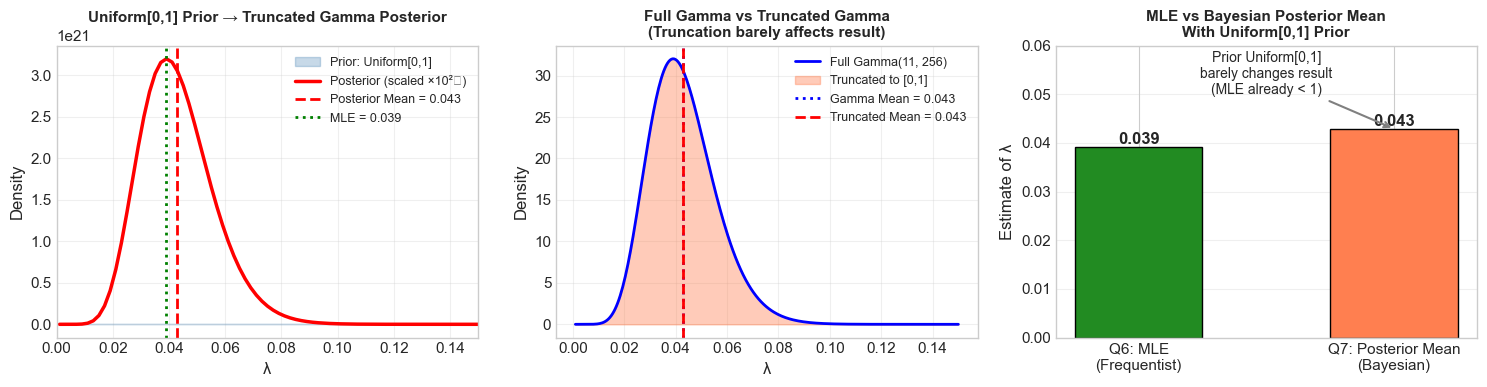


📊 Key Insights:
   • Prior: Uniform[0,1] restricts λ to [0, 1]
   • Posterior: Gamma(11, 256) truncated to [0, 1]
   • Since MLE = 0.039 < 1, truncation has minimal effect
   • Posterior Mean = 0.043


In [27]:
# Visualization: Q7 - Bayesian Posterior with Uniform[0,1] Prior
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Data
n_viz = 10
sum_x_viz = 256
shape_viz = n_viz + 1  # 11
rate_viz = sum_x_viz   # 256
scale_viz = 1 / rate_viz

# Recalculate posterior mean
from scipy.integrate import quad
def unnorm_post(lam):
    return (lam ** n_viz) * np.exp(-lam * sum_x_viz)
def lam_unnorm_post(lam):
    return lam * (lam ** n_viz) * np.exp(-lam * sum_x_viz)

norm_const, _ = quad(unnorm_post, 0, 1)
num_int, _ = quad(lam_unnorm_post, 0, 1)
post_mean_viz = num_int / norm_const
mle_viz = n_viz / sum_x_viz

# Plot 1: Prior (Uniform[0,1]) vs Posterior
lambda_range = np.linspace(0.001, 1, 500)

# Uniform prior
prior_pdf = np.ones_like(lambda_range)

# Truncated Gamma posterior (normalized on [0,1])
unnorm_posterior = (lambda_range ** n_viz) * np.exp(-lambda_range * sum_x_viz)
posterior_pdf = unnorm_posterior / norm_const

axes[0].fill_between(lambda_range, prior_pdf, alpha=0.3, color='steelblue', label='Prior: Uniform[0,1]')
axes[0].plot(lambda_range, posterior_pdf * 1e20, 'r-', linewidth=2.5, 
             label=f'Posterior (scaled ×10²⁰)')
axes[0].axvline(x=post_mean_viz, color='red', linestyle='--', linewidth=2, 
                label=f'Posterior Mean = {post_mean_viz:.3f}')
axes[0].axvline(x=mle_viz, color='green', linestyle=':', linewidth=2, 
                label=f'MLE = {mle_viz:.3f}')
axes[0].set_xlabel('λ', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Uniform[0,1] Prior → Truncated Gamma Posterior', fontsize=11, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].set_xlim([0, 0.15])
axes[0].grid(True, alpha=0.3)

# Plot 2: Full Gamma vs Truncated Gamma
lambda_range_full = np.linspace(0.001, 0.15, 300)
full_gamma_pdf = stats.gamma.pdf(lambda_range_full, a=shape_viz, scale=scale_viz)

axes[1].plot(lambda_range_full, full_gamma_pdf, 'b-', linewidth=2, 
             label=f'Full Gamma({shape_viz}, {rate_viz})')
axes[1].fill_between(lambda_range_full[lambda_range_full <= 1], 
                     full_gamma_pdf[lambda_range_full <= 1], 
                     alpha=0.4, color='coral', label='Truncated to [0,1]')
axes[1].axvline(x=shape_viz/rate_viz, color='blue', linestyle=':', linewidth=2, 
                label=f'Gamma Mean = {shape_viz/rate_viz:.3f}')
axes[1].axvline(x=post_mean_viz, color='red', linestyle='--', linewidth=2, 
                label=f'Truncated Mean = {post_mean_viz:.3f}')
axes[1].set_xlabel('λ', fontsize=12)
axes[1].set_ylabel('Density', fontsize=12)
axes[1].set_title('Full Gamma vs Truncated Gamma\n(Truncation barely affects result)', fontsize=11, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

# Plot 3: Comparison of Q6 (MLE) vs Q7 (Bayesian)
methods = ['Q6: MLE\n(Frequentist)', 'Q7: Posterior Mean\n(Bayesian)']
estimates = [mle_viz, post_mean_viz]
colors_bar = ['forestgreen', 'coral']

bars = axes[2].bar(methods, estimates, color=colors_bar, edgecolor='black', width=0.5)
axes[2].bar_label(bars, fmt='%.3f', fontsize=12, fontweight='bold')
axes[2].set_ylabel('Estimate of λ', fontsize=12)
axes[2].set_title('MLE vs Bayesian Posterior Mean\nWith Uniform[0,1] Prior', fontsize=11, fontweight='bold')
axes[2].set_ylim([0, 0.06])
axes[2].grid(True, alpha=0.3, axis='y')

# Add annotation
axes[2].annotate('Prior Uniform[0,1]\nbarely changes result\n(MLE already < 1)', 
                xy=(1, post_mean_viz), xytext=(0.5, 0.05),
                fontsize=10, ha='center',
                arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"   • Prior: Uniform[0,1] restricts λ to [0, 1]")
print(f"   • Posterior: Gamma(11, 256) truncated to [0, 1]")
print(f"   • Since MLE = {mle_viz:.3f} < 1, truncation has minimal effect")
print(f"   • Posterior Mean = {post_mean_viz:.3f}")

---

## Question 8: Poisson Posterior Mode with Discrete Prior

**Problem:** We are given that the number of emergency patients arriving at a hospital each night follows a **Poisson distribution** with an unknown parameter λ. Historical data gives prior beliefs that $P(\lambda = 7) = 0.25$ and $P(\lambda = 5) = 0.75$. If 9 emergency patients arrived on a particular night, then find the **posterior mode** of λ.

**Method:** Discrete Bayes' Theorem
$$P(\lambda|X=9) = \frac{P(X=9|\lambda) \cdot P(\lambda)}{P(X=9)}$$

The **posterior mode** is the value of λ with the highest posterior probability.

---

In [28]:
# Question 8: Solution
print("Question 8: Poisson Posterior Mode with Discrete Prior")
print("=" * 70)

# Given
lambda_vals_q8 = [7, 5]
prior_probs_q8 = [0.25, 0.75]
observed_x_q8 = 9

print(f"\nGiven:")
print(f"  Prior: P(λ=7) = {prior_probs_q8[0]}, P(λ=5) = {prior_probs_q8[1]}")
print(f"  Observed: X = {observed_x_q8} emergency patients")

# Step 1: Calculate likelihoods P(X=9 | λ)
print(f"\nStep 1: Calculate Likelihoods P(X=9|λ)")
print("-" * 70)
likelihoods_q8 = [stats.poisson.pmf(observed_x_q8, lam) for lam in lambda_vals_q8]
for lam, lik in zip(lambda_vals_q8, likelihoods_q8):
    print(f"  P(X=9|λ={lam}) = {lam}⁹ × e^(-{lam}) / 9! = {lik:.6f}")

# Step 2: Calculate joint probabilities P(X=9, λ)
print(f"\nStep 2: Calculate Joint Probabilities P(X=9, λ)")
print("-" * 70)
joint_probs_q8 = [lik * prior for lik, prior in zip(likelihoods_q8, prior_probs_q8)]
for lam, joint in zip(lambda_vals_q8, joint_probs_q8):
    print(f"  P(X=9, λ={lam}) = P(X=9|λ={lam}) × P(λ={lam}) = {joint:.6f}")

# Step 3: Calculate marginal P(X=9)
marginal_q8 = sum(joint_probs_q8)
print(f"\nStep 3: Calculate Marginal P(X=9)")
print("-" * 70)
print(f"  P(X=9) = Σ P(X=9, λ) = {marginal_q8:.6f}")

# Step 4: Calculate posterior probabilities
print(f"\nStep 4: Calculate Posterior Probabilities P(λ|X=9)")
print("-" * 70)
posterior_probs_q8 = [j / marginal_q8 for j in joint_probs_q8]
for lam, post in zip(lambda_vals_q8, posterior_probs_q8):
    marker = " ← MODE" if post == max(posterior_probs_q8) else ""
    print(f"  P(λ={lam}|X=9) = {post:.4f} ({post:.2%}){marker}")

# Posterior mode
mode_index_q8 = np.argmax(posterior_probs_q8)
posterior_mode_q8 = lambda_vals_q8[mode_index_q8]

print("\n" + "=" * 70)
print(f"✓ ANSWER: Posterior Mode = λ = {posterior_mode_q8}")
print("=" * 70)

Question 8: Poisson Posterior Mode with Discrete Prior

Given:
  Prior: P(λ=7) = 0.25, P(λ=5) = 0.75
  Observed: X = 9 emergency patients

Step 1: Calculate Likelihoods P(X=9|λ)
----------------------------------------------------------------------
  P(X=9|λ=7) = 7⁹ × e^(-7) / 9! = 0.101405
  P(X=9|λ=5) = 5⁹ × e^(-5) / 9! = 0.036266

Step 2: Calculate Joint Probabilities P(X=9, λ)
----------------------------------------------------------------------
  P(X=9, λ=7) = P(X=9|λ=7) × P(λ=7) = 0.025351
  P(X=9, λ=5) = P(X=9|λ=5) × P(λ=5) = 0.027199

Step 3: Calculate Marginal P(X=9)
----------------------------------------------------------------------
  P(X=9) = Σ P(X=9, λ) = 0.052550

Step 4: Calculate Posterior Probabilities P(λ|X=9)
----------------------------------------------------------------------
  P(λ=7|X=9) = 0.4824 (48.24%)
  P(λ=5|X=9) = 0.5176 (51.76%) ← MODE

✓ ANSWER: Posterior Mode = λ = 5


### Answer: $\boxed{\lambda = 5}$

**Summary:**
- Prior strongly favored λ=5 (75% vs 25%)
- Likelihood favored λ=7: P(X=9|λ=7) = 0.101 > P(X=9|λ=5) = 0.036
- But strong prior wins: P(λ=5|X=9) = 51.76% > P(λ=7|X=9) = 48.24%
- **Posterior Mode: λ = 5**

**Key Insight:** Even though observing X=9 patients is more likely under λ=7, the strong prior belief in λ=5 (75%) keeps it as the mode.

---

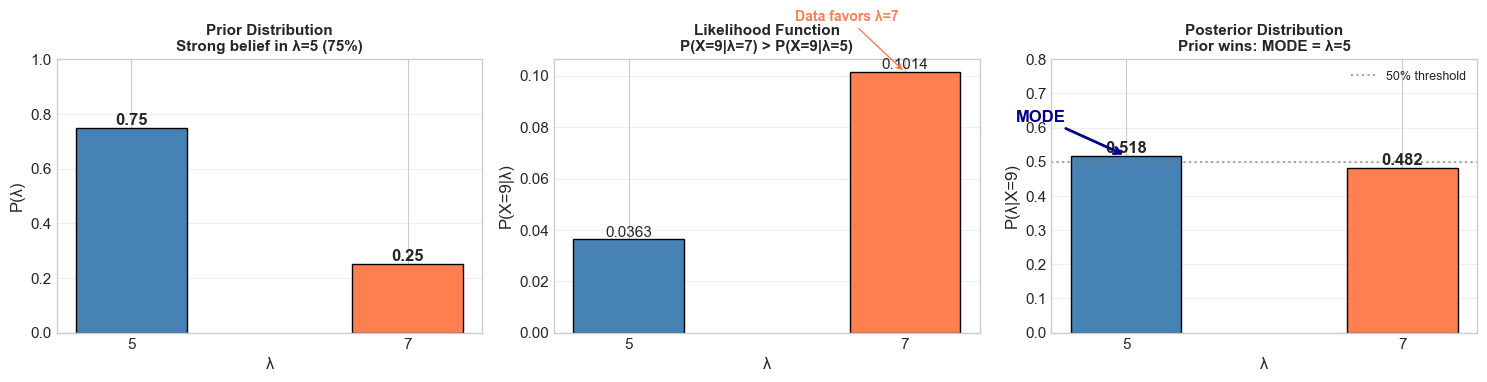


📊 Key Insights:
   • Prior strongly favored λ=5 (75% vs 25%)
   • Likelihood favored λ=7 (observing 9 patients more likely)
   • But prior was strong enough → Posterior mode = λ=5
   • Close call: 51.76% vs 48.24%


In [29]:
# Visualization: Q8 - Poisson Posterior Mode with Discrete Prior
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Data from Q8
lambda_vals_viz = [5, 7]  # Ordered for plotting
prior_probs_viz = [0.75, 0.25]
observed_viz = 9

# Calculate probabilities
likelihoods_viz = [stats.poisson.pmf(observed_viz, lam) for lam in lambda_vals_viz]
joint_probs_viz = [lik * prior for lik, prior in zip(likelihoods_viz, prior_probs_viz)]
marginal_viz = sum(joint_probs_viz)
posterior_probs_viz = [j / marginal_viz for j in joint_probs_viz]

# Plot 1: Prior Distribution
colors_q8 = ['steelblue', 'coral']
bars1 = axes[0].bar(lambda_vals_viz, prior_probs_viz, color=colors_q8, edgecolor='black', width=0.8)
axes[0].bar_label(bars1, fmt='%.2f', fontsize=12, fontweight='bold')
axes[0].set_xlabel('λ', fontsize=12)
axes[0].set_ylabel('P(λ)', fontsize=12)
axes[0].set_title('Prior Distribution\nStrong belief in λ=5 (75%)', fontsize=11, fontweight='bold')
axes[0].set_xticks(lambda_vals_viz)
axes[0].set_ylim([0, 1])
axes[0].grid(True, alpha=0.3, axis='y')

# Plot 2: Likelihood P(X=9|λ)
bars2 = axes[1].bar(lambda_vals_viz, likelihoods_viz, color=colors_q8, edgecolor='black', width=0.8)
axes[1].bar_label(bars2, fmt='%.4f', fontsize=11)
axes[1].set_xlabel('λ', fontsize=12)
axes[1].set_ylabel('P(X=9|λ)', fontsize=12)
axes[1].set_title('Likelihood Function\nP(X=9|λ=7) > P(X=9|λ=5)', fontsize=11, fontweight='bold')
axes[1].set_xticks(lambda_vals_viz)
axes[1].grid(True, alpha=0.3, axis='y')

# Annotate the likelihood winner
axes[1].annotate('Data favors λ=7', xy=(7, likelihoods_viz[1]), xytext=(6.2, likelihoods_viz[1] + 0.02),
                fontsize=10, color='coral', fontweight='bold',
                arrowprops=dict(arrowstyle='->', color='coral'))

# Plot 3: Posterior Distribution (with MODE highlighted)
bars3 = axes[2].bar(lambda_vals_viz, posterior_probs_viz, color=colors_q8, edgecolor='black', width=0.8)
axes[2].bar_label(bars3, fmt='%.3f', fontsize=12, fontweight='bold')
axes[2].axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, label='50% threshold')
# Highlight the mode
mode_idx_viz = np.argmax(posterior_probs_viz)
axes[2].annotate('MODE', xy=(lambda_vals_viz[mode_idx_viz], posterior_probs_viz[mode_idx_viz]), 
                xytext=(lambda_vals_viz[mode_idx_viz] - 0.8, posterior_probs_viz[mode_idx_viz] + 0.1),
                fontsize=12, fontweight='bold', color='darkblue',
                arrowprops=dict(arrowstyle='->', color='darkblue', lw=2))
axes[2].set_xlabel('λ', fontsize=12)
axes[2].set_ylabel('P(λ|X=9)', fontsize=12)
axes[2].set_title('Posterior Distribution\nPrior wins: MODE = λ=5', fontsize=11, fontweight='bold')
axes[2].set_xticks(lambda_vals_viz)
axes[2].set_ylim([0, 0.8])
axes[2].legend(loc='upper right', fontsize=9)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("   • Prior strongly favored λ=5 (75% vs 25%)")
print("   • Likelihood favored λ=7 (observing 9 patients more likely)")
print("   • But prior was strong enough → Posterior mode = λ=5")
print("   • Close call: 51.76% vs 48.24%")

---

## Question 9: Gamma Prior Parameter Relationship

**Problem:** A hospital tracks the daily number of emergency cases as a random variable X following a **Poisson distribution** with an unknown average arrival rate λ. The hospital models λ with a **Gamma prior** having parameters α and β.

Derive an expression for β in terms of α, that results in a **prior mean of 3.5**.

**Options:**
- a. $\beta = \frac{\alpha}{3.5}$
- b. $\beta = 3.5\alpha$
- c. $\beta = \frac{\alpha}{3}$
- d. $\beta = \frac{3.5}{\alpha}$

**Key Formula:** For Gamma(α, β) distribution:
$$E[\lambda] = \frac{\alpha}{\beta}$$

---

In [30]:
# Question 9: Solution
print("Question 9: Gamma Prior Parameter Relationship")
print("=" * 70)

# Given data
emergency_data = np.array([3, 6, 5, 7, 4, 6, 8, 5, 6, 7, 4, 5, 6, 7])
n_days = len(emergency_data)
sum_cases = np.sum(emergency_data)
mean_cases = np.mean(emergency_data)
prior_mean_target = 3.5

print(f"\nGiven:")
print(f"  Data: {emergency_data.tolist()}")
print(f"  n = {n_days} days, Σxᵢ = {sum_cases}, x̄ = {mean_cases:.2f}")
print(f"  Prior: λ ~ Gamma(α, β)")
print(f"  Target prior mean: E[λ] = {prior_mean_target}")

# Step 1: Gamma distribution mean formula
print(f"\nStep 1: Recall Gamma Distribution Mean")
print("-" * 70)
print("  For λ ~ Gamma(α, β):")
print("  E[λ] = α / β")

# Step 2: Solve for β
print(f"\nStep 2: Solve for β given E[λ] = 3.5")
print("-" * 70)
print("  E[λ] = α / β = 3.5")
print("  ⟹ β = α / 3.5")

# Step 3: Verify with examples
print(f"\nStep 3: Verify with Numerical Examples")
print("-" * 70)
test_alphas = [1, 2, 3.5, 7, 10]
print(f"  {'α':<10} {'β = α/3.5':<15} {'E[λ] = α/β':<15}")
print(f"  {'-'*10} {'-'*15} {'-'*15}")
for alpha in test_alphas:
    beta = alpha / 3.5
    mean = alpha / beta
    print(f"  {alpha:<10} {beta:<15.4f} {mean:<15.4f}")

# Step 4: Check all options
print(f"\nStep 4: Evaluate All Options")
print("-" * 70)
alpha_test = 7  # Example alpha

options = {
    'a': ('α / 3.5', alpha_test / 3.5),
    'b': ('3.5 × α', 3.5 * alpha_test),
    'c': ('α / 3', alpha_test / 3),
    'd': ('3.5 / α', 3.5 / alpha_test)
}

print(f"  Testing with α = {alpha_test}:")
for opt, (formula, beta_val) in options.items():
    mean_result = alpha_test / beta_val
    correct = "✓ CORRECT" if abs(mean_result - 3.5) < 0.001 else "✗"
    print(f"  Option {opt}: β = {formula:<10} = {beta_val:.4f} → E[λ] = {mean_result:.4f} {correct}")

print("\n" + "=" * 70)
print("✓ ANSWER: Option (a) β = α / 3.5")
print("=" * 70)

Question 9: Gamma Prior Parameter Relationship

Given:
  Data: [3, 6, 5, 7, 4, 6, 8, 5, 6, 7, 4, 5, 6, 7]
  n = 14 days, Σxᵢ = 79, x̄ = 5.64
  Prior: λ ~ Gamma(α, β)
  Target prior mean: E[λ] = 3.5

Step 1: Recall Gamma Distribution Mean
----------------------------------------------------------------------
  For λ ~ Gamma(α, β):
  E[λ] = α / β

Step 2: Solve for β given E[λ] = 3.5
----------------------------------------------------------------------
  E[λ] = α / β = 3.5
  ⟹ β = α / 3.5

Step 3: Verify with Numerical Examples
----------------------------------------------------------------------
  α          β = α/3.5       E[λ] = α/β     
  ---------- --------------- ---------------
  1          0.2857          3.5000         
  2          0.5714          3.5000         
  3.5        1.0000          3.5000         
  7          2.0000          3.5000         
  10         2.8571          3.5000         

Step 4: Evaluate All Options
---------------------------------------------------

### Answer: $\boxed{\text{(a) } \beta = \frac{\alpha}{3.5}}$

**Derivation:**
- For Gamma(α, β): $E[\lambda] = \frac{\alpha}{\beta}$
- Given: $E[\lambda] = 3.5$
- Therefore: $\frac{\alpha}{\beta} = 3.5$
- Solving: $\beta = \frac{\alpha}{3.5}$

**Why other options are wrong:**
| Option | Formula | E[λ] with α=7 |
|--------|---------|---------------|
| a ✓ | β = α/3.5 | 3.5 |
| b | β = 3.5α | 0.286 |
| c | β = α/3 | 3.0 |
| d | β = 3.5/α | 14.0 |

---

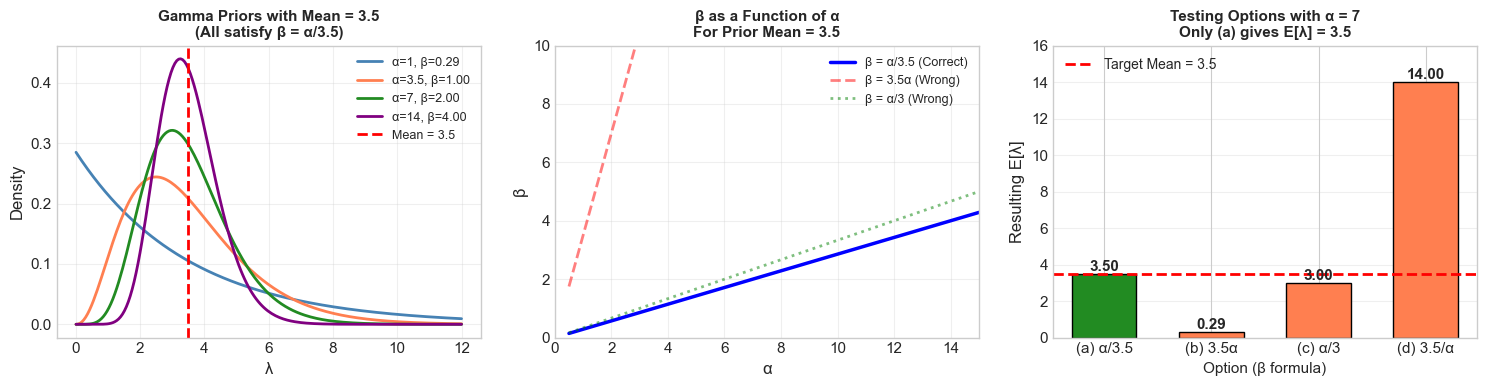


📊 Key Insights:
   • Gamma(α, β) has mean E[λ] = α/β
   • For mean = 3.5: β = α/3.5
   • This works for any α > 0
   • Answer: Option (a)


In [31]:
# Visualization: Q9 - Gamma Prior Parameter Relationship
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Gamma PDFs with different α but same mean = 3.5
lambda_range_q9 = np.linspace(0.01, 12, 200)
alphas_to_show = [1, 3.5, 7, 14]
colors_q9 = ['steelblue', 'coral', 'forestgreen', 'purple']

for alpha, color in zip(alphas_to_show, colors_q9):
    beta = alpha / 3.5  # β = α/3.5 to ensure mean = 3.5
    pdf = stats.gamma.pdf(lambda_range_q9, a=alpha, scale=1/beta)
    axes[0].plot(lambda_range_q9, pdf, linewidth=2, color=color, 
                label=f'α={alpha}, β={beta:.2f}')

axes[0].axvline(x=3.5, color='red', linestyle='--', linewidth=2, label='Mean = 3.5')
axes[0].set_xlabel('λ', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title('Gamma Priors with Mean = 3.5\n(All satisfy β = α/3.5)', fontsize=11, fontweight='bold')
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Plot 2: Relationship β = α/3.5
alpha_range = np.linspace(0.5, 15, 100)
beta_correct = alpha_range / 3.5

axes[1].plot(alpha_range, beta_correct, 'b-', linewidth=2.5, label='β = α/3.5 (Correct)')
axes[1].plot(alpha_range, 3.5 * alpha_range, 'r--', linewidth=2, alpha=0.5, label='β = 3.5α (Wrong)')
axes[1].plot(alpha_range, alpha_range / 3, 'g:', linewidth=2, alpha=0.5, label='β = α/3 (Wrong)')
axes[1].set_xlabel('α', fontsize=12)
axes[1].set_ylabel('β', fontsize=12)
axes[1].set_title('β as a Function of α\nFor Prior Mean = 3.5', fontsize=11, fontweight='bold')
axes[1].legend(fontsize=9)
axes[1].set_xlim([0, 15])
axes[1].set_ylim([0, 10])
axes[1].grid(True, alpha=0.3)

# Plot 3: Verify all options give correct/incorrect mean
options_q9 = ['(a) α/3.5', '(b) 3.5α', '(c) α/3', '(d) 3.5/α']
alpha_test = 7
betas_q9 = [alpha_test/3.5, 3.5*alpha_test, alpha_test/3, 3.5/alpha_test]
means_q9 = [alpha_test/b for b in betas_q9]
colors_opts_q9 = ['forestgreen', 'coral', 'coral', 'coral']

bars_q9 = axes[2].bar(options_q9, means_q9, color=colors_opts_q9, edgecolor='black', width=0.6)
axes[2].bar_label(bars_q9, fmt='%.2f', fontsize=11, fontweight='bold')
axes[2].axhline(y=3.5, color='red', linestyle='--', linewidth=2, label='Target Mean = 3.5')
axes[2].set_xlabel('Option (β formula)', fontsize=11)
axes[2].set_ylabel('Resulting E[λ]', fontsize=12)
axes[2].set_title(f'Testing Options with α = {alpha_test}\nOnly (a) gives E[λ] = 3.5', fontsize=11, fontweight='bold')
axes[2].legend(fontsize=10)
axes[2].set_ylim([0, 16])
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("   • Gamma(α, β) has mean E[λ] = α/β")
print("   • For mean = 3.5: β = α/3.5")
print("   • This works for any α > 0")
print("   • Answer: Option (a)")

---

## Question 10: Beta-Geometric Conjugate (Negative Binomial)

A doctor is testing patients for a rare disease. She continues testing until finding the first positive case. Let $p$ be the probability that a patient tests negative. The prior distribution of $p$ is $\text{Beta}(\alpha, \beta)$, with prior mean equal to $0.8$. After testing 12 patients, she finds that the first 11 test negative and the 12th tests positive. What is the **posterior mean of $p$ in terms of $\beta$**?

**Options:**
- A. $\frac{4\beta + 11}{5\beta + 12}$
- B. $\frac{4\beta + 11}{5\beta + 1}$
- C. $\frac{4\beta + 10}{5\beta + 11}$
- D. $\frac{4\beta + 11}{\beta + 1}$

### Solution

**Understanding the Problem:**
- Prior: $p \sim \text{Beta}(\alpha, \beta)$ with $E[p] = \frac{\alpha}{\alpha + \beta} = 0.8$
- Data: 11 negatives (success for $p$), then 1 positive (failure)
- This is a **Geometric distribution** scenario (waiting for first success/failure)

**Step 1: Find relationship between α and β from prior mean**
$$\frac{\alpha}{\alpha + \beta} = 0.8 = \frac{4}{5}$$
$$5\alpha = 4(\alpha + \beta)$$
$$5\alpha = 4\alpha + 4\beta$$
$$\alpha = 4\beta$$

**Step 2: Likelihood for Geometric data**
If $p$ = P(negative), then P(positive) = $1-p$

The likelihood for observing 11 negatives then 1 positive:
$$L(p) = p^{11} \cdot (1-p)^1$$

**Step 3: Posterior distribution (Beta-Binomial conjugacy)**
$$\text{Prior: Beta}(\alpha, \beta) \propto p^{\alpha-1}(1-p)^{\beta-1}$$
$$\text{Likelihood} \propto p^{11}(1-p)^{1}$$
$$\text{Posterior} \propto p^{\alpha + 11 - 1}(1-p)^{\beta + 1 - 1}$$
$$\text{Posterior: Beta}(\alpha + 11, \beta + 1)$$

**Step 4: Calculate posterior mean**
$$E[p|X] = \frac{\alpha + 11}{\alpha + 11 + \beta + 1} = \frac{\alpha + 11}{\alpha + \beta + 12}$$

**Step 5: Substitute α = 4β**
$$E[p|X] = \frac{4\beta + 11}{4\beta + \beta + 12} = \frac{4\beta + 11}{5\beta + 12}$$

In [32]:
# Question 10: Beta-Geometric Conjugate - Posterior Mean
# =======================================================

print("=" * 70)
print("Q10: Beta-Geometric Conjugate - Posterior Mean of p")
print("=" * 70)

# Given information
prior_mean_p = 0.8  # E[p] = α/(α+β) = 0.8
n_negatives = 11    # 11 patients test negative
n_positives = 1     # 1 patient tests positive (the 12th)

print("\n📋 Given Information:")
print(f"   • Prior: p ~ Beta(α, β)")
print(f"   • Prior mean: E[p] = α/(α+β) = {prior_mean_p}")
print(f"   • Data: {n_negatives} negatives, then {n_positives} positive")

# Step 1: Find α in terms of β
# α/(α+β) = 0.8 = 4/5
# 5α = 4α + 4β
# α = 4β
print("\n" + "=" * 50)
print("Step 1: Express α in terms of β")
print("=" * 50)
print("   α/(α+β) = 0.8 = 4/5")
print("   5α = 4(α + β)")
print("   5α = 4α + 4β")
print("   α = 4β")

# Step 2: Identify the likelihood
print("\n" + "=" * 50)
print("Step 2: Likelihood for Geometric Data")
print("=" * 50)
print("   p = P(patient tests negative)")
print("   1-p = P(patient tests positive)")
print("   ")
print("   Observe: 11 negatives, then 1 positive")
print("   L(p) = p^11 × (1-p)^1")

# Step 3: Posterior distribution using conjugacy
print("\n" + "=" * 50)
print("Step 3: Beta-Binomial Conjugacy")
print("=" * 50)
print("   Prior:      Beta(α, β)")
print("   Likelihood: p^11 × (1-p)^1")
print("   ")
print("   Posterior:  Beta(α + 11, β + 1)")
print("   ")
print("   Update rules:")
print("   • α_post = α + (# of negatives) = α + 11")
print("   • β_post = β + (# of positives) = β + 1")

# Step 4: Calculate posterior mean
print("\n" + "=" * 50)
print("Step 4: Posterior Mean")
print("=" * 50)
print("   E[p|X] = α_post / (α_post + β_post)")
print("         = (α + 11) / (α + 11 + β + 1)")
print("         = (α + 11) / (α + β + 12)")

# Step 5: Substitute α = 4β
print("\n" + "=" * 50)
print("Step 5: Substitute α = 4β")
print("=" * 50)
print("   E[p|X] = (4β + 11) / (4β + β + 12)")
print("         = (4β + 11) / (5β + 12)")

# Verify with specific β value
print("\n" + "=" * 50)
print("Verification with β = 1")
print("=" * 50)
beta_test = 1
alpha_test_q10 = 4 * beta_test  # α = 4β

# Prior parameters
print(f"   β = {beta_test}, so α = 4β = {alpha_test_q10}")
print(f"   Prior: Beta({alpha_test_q10}, {beta_test})")
print(f"   Prior mean: {alpha_test_q10}/{alpha_test_q10 + beta_test} = {alpha_test_q10/(alpha_test_q10 + beta_test):.4f}")

# Posterior parameters
alpha_post_q10 = alpha_test_q10 + n_negatives  # 4 + 11 = 15
beta_post_q10 = beta_test + n_positives        # 1 + 1 = 2

print(f"\n   Posterior: Beta({alpha_post_q10}, {beta_post_q10})")
posterior_mean_q10 = alpha_post_q10 / (alpha_post_q10 + beta_post_q10)
print(f"   Posterior mean: {alpha_post_q10}/{alpha_post_q10 + beta_post_q10} = {posterior_mean_q10:.6f}")

# Check formula
formula_result = (4*beta_test + 11) / (5*beta_test + 12)
print(f"\n   Formula (4β+11)/(5β+12): (4×{beta_test}+11)/(5×{beta_test}+12)")
print(f"                          = {4*beta_test + 11}/{5*beta_test + 12}")
print(f"                          = {formula_result:.6f}")

print(f"\n   ✓ Match confirmed!")

# Check all options
print("\n" + "=" * 50)
print("Testing All Options with β = 1:")
print("=" * 50)

options_q10 = {
    'A': (4*beta_test + 11) / (5*beta_test + 12),
    'B': (4*beta_test + 11) / (5*beta_test + 1),
    'C': (4*beta_test + 10) / (5*beta_test + 11),
    'D': (4*beta_test + 11) / (beta_test + 1)
}

formulas_q10 = {
    'A': '(4β + 11)/(5β + 12)',
    'B': '(4β + 11)/(5β + 1)',
    'C': '(4β + 10)/(5β + 11)',
    'D': '(4β + 11)/(β + 1)'
}

for opt, val in options_q10.items():
    match = "✓ CORRECT" if abs(val - posterior_mean_q10) < 1e-10 else "✗"
    print(f"   Option {opt}: {formulas_q10[opt]:20} = {val:.6f} {match}")

print("\n" + "=" * 70)
print("📌 ANSWER: Option A - (4β + 11)/(5β + 12)")
print("=" * 70)

Q10: Beta-Geometric Conjugate - Posterior Mean of p

📋 Given Information:
   • Prior: p ~ Beta(α, β)
   • Prior mean: E[p] = α/(α+β) = 0.8
   • Data: 11 negatives, then 1 positive

Step 1: Express α in terms of β
   α/(α+β) = 0.8 = 4/5
   5α = 4(α + β)
   5α = 4α + 4β
   α = 4β

Step 2: Likelihood for Geometric Data
   p = P(patient tests negative)
   1-p = P(patient tests positive)
   
   Observe: 11 negatives, then 1 positive
   L(p) = p^11 × (1-p)^1

Step 3: Beta-Binomial Conjugacy
   Prior:      Beta(α, β)
   Likelihood: p^11 × (1-p)^1
   
   Posterior:  Beta(α + 11, β + 1)
   
   Update rules:
   • α_post = α + (# of negatives) = α + 11
   • β_post = β + (# of positives) = β + 1

Step 4: Posterior Mean
   E[p|X] = α_post / (α_post + β_post)
         = (α + 11) / (α + 11 + β + 1)
         = (α + 11) / (α + β + 12)

Step 5: Substitute α = 4β
   E[p|X] = (4β + 11) / (4β + β + 12)
         = (4β + 11) / (5β + 12)

Verification with β = 1
   β = 1, so α = 4β = 4
   Prior: Beta(4, 1)
  

### ✅ Answer: Option A

$$\boxed{E[p|X] = \frac{4\beta + 11}{5\beta + 12}}$$

**Key Steps:**
1. From prior mean = 0.8: $\alpha = 4\beta$
2. Geometric likelihood: $L(p) = p^{11}(1-p)^1$
3. Posterior: $\text{Beta}(\alpha + 11, \beta + 1)$
4. Posterior mean: $\frac{\alpha + 11}{\alpha + \beta + 12} = \frac{4\beta + 11}{5\beta + 12}$

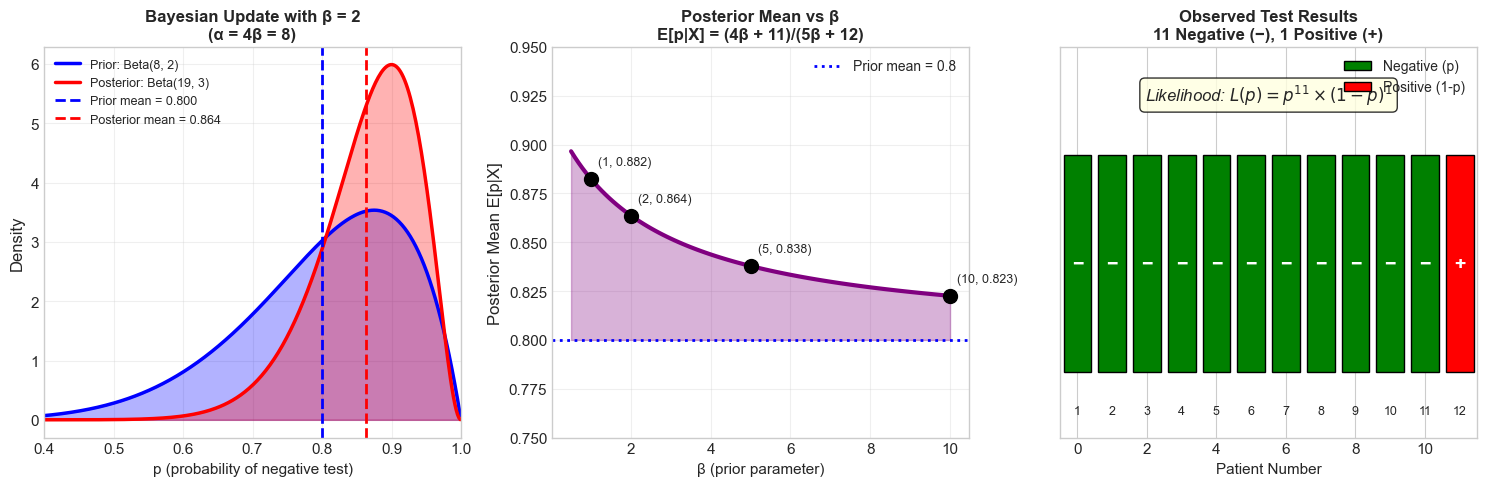


📊 Key Insights:
   • This is a Geometric/Negative Binomial scenario
   • Beta prior is conjugate for Bernoulli/Binomial/Geometric likelihoods
   • 11 negatives → add 11 to α; 1 positive → add 1 to β
   • Answer: Option A - (4β + 11)/(5β + 12)


In [33]:
# Visualization: Q10 - Beta-Geometric Conjugate Update
# =====================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

p_range_q10 = np.linspace(0.001, 0.999, 500)

# Use β = 2 for clearer visualization
beta_viz_q10 = 2
alpha_viz_q10 = 4 * beta_viz_q10  # α = 4β = 8

# Panel 1: Prior and Posterior distributions
ax1 = axes[0]

# Prior: Beta(8, 2)
prior_pdf_q10 = stats.beta.pdf(p_range_q10, alpha_viz_q10, beta_viz_q10)
ax1.plot(p_range_q10, prior_pdf_q10, 'b-', linewidth=2.5, label=f'Prior: Beta({alpha_viz_q10}, {beta_viz_q10})')
ax1.fill_between(p_range_q10, prior_pdf_q10, alpha=0.3, color='blue')

# Posterior: Beta(α+11, β+1) = Beta(19, 3)
alpha_post_viz = alpha_viz_q10 + 11
beta_post_viz = beta_viz_q10 + 1
posterior_pdf_q10 = stats.beta.pdf(p_range_q10, alpha_post_viz, beta_post_viz)
ax1.plot(p_range_q10, posterior_pdf_q10, 'r-', linewidth=2.5, label=f'Posterior: Beta({alpha_post_viz}, {beta_post_viz})')
ax1.fill_between(p_range_q10, posterior_pdf_q10, alpha=0.3, color='red')

# Mark means
prior_mean_viz = alpha_viz_q10 / (alpha_viz_q10 + beta_viz_q10)
posterior_mean_viz = alpha_post_viz / (alpha_post_viz + beta_post_viz)

ax1.axvline(x=prior_mean_viz, color='blue', linestyle='--', linewidth=2, 
            label=f'Prior mean = {prior_mean_viz:.3f}')
ax1.axvline(x=posterior_mean_viz, color='red', linestyle='--', linewidth=2,
            label=f'Posterior mean = {posterior_mean_viz:.3f}')

ax1.set_xlabel('p (probability of negative test)', fontsize=11)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title(f'Bayesian Update with β = {beta_viz_q10}\n(α = 4β = {alpha_viz_q10})', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9, loc='upper left')
ax1.set_xlim([0.4, 1.0])
ax1.grid(True, alpha=0.3)

# Panel 2: Posterior mean as function of β
ax2 = axes[1]

beta_range_q10 = np.linspace(0.5, 10, 100)
posterior_means_q10 = (4*beta_range_q10 + 11) / (5*beta_range_q10 + 12)

ax2.plot(beta_range_q10, posterior_means_q10, 'purple', linewidth=3)
ax2.fill_between(beta_range_q10, 0.8, posterior_means_q10, alpha=0.3, color='purple')

# Mark specific points
test_betas = [1, 2, 5, 10]
for b in test_betas:
    mean_at_b = (4*b + 11) / (5*b + 12)
    ax2.plot(b, mean_at_b, 'ko', markersize=10)
    ax2.annotate(f'({b}, {mean_at_b:.3f})', (b, mean_at_b), 
                 textcoords="offset points", xytext=(5, 10), fontsize=9)

ax2.axhline(y=0.8, color='blue', linestyle=':', linewidth=2, label='Prior mean = 0.8')
ax2.set_xlabel('β (prior parameter)', fontsize=11)
ax2.set_ylabel('Posterior Mean E[p|X]', fontsize=12)
ax2.set_title('Posterior Mean vs β\nE[p|X] = (4β + 11)/(5β + 12)', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)
ax2.set_ylim([0.75, 0.95])

# Panel 3: Testing scenario visualization
ax3 = axes[2]

# Show the sequence of tests
positions_q10 = np.arange(12)
colors_q10 = ['green'] * 11 + ['red']  # 11 negatives (green), 1 positive (red)
labels_q10 = ['−'] * 11 + ['+']

bars_q10 = ax3.bar(positions_q10, [1]*12, color=colors_q10, edgecolor='black', width=0.8)

for i, (bar, lab) in enumerate(zip(bars_q10, labels_q10)):
    ax3.text(bar.get_x() + bar.get_width()/2, 0.5, lab, 
             ha='center', va='center', fontsize=14, fontweight='bold',
             color='white' if i < 11 else 'white')
    ax3.text(bar.get_x() + bar.get_width()/2, -0.15, str(i+1),
             ha='center', va='top', fontsize=9)

ax3.set_xlim([-0.5, 11.5])
ax3.set_ylim([-0.3, 1.5])
ax3.set_xlabel('Patient Number', fontsize=11)
ax3.set_ylabel('')
ax3.set_title('Observed Test Results\n11 Negative (−), 1 Positive (+)', fontsize=12, fontweight='bold')
ax3.set_yticks([])

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='green', edgecolor='black', label='Negative (p)'),
                   Patch(facecolor='red', edgecolor='black', label='Positive (1-p)')]
ax3.legend(handles=legend_elements, loc='upper right', fontsize=10)

# Add formula annotation
ax3.text(5.5, 1.25, r'Likelihood: $L(p) = p^{11} \times (1-p)^1$', 
         ha='center', fontsize=12, style='italic',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print("   • This is a Geometric/Negative Binomial scenario")
print("   • Beta prior is conjugate for Bernoulli/Binomial/Geometric likelihoods")
print("   • 11 negatives → add 11 to α; 1 positive → add 1 to β")
print("   • Answer: Option A - (4β + 11)/(5β + 12)")

---

## Question 11: Beta-Binomial with Prior Mean and Variance

The probability that a customer successfully completes an online bank transaction is modeled by a **Bernoulli$(p)$** random variable, where $p$ is unknown. A sample of **40 customers** shows **28 successful transactions**. A **Beta distribution** is used as the prior for $p$ with mean and variance of **0.4** and **0.02**, respectively. Find the posterior mean of $p$.

### Solution

**Step 1: Find Prior Parameters α and β**

For Beta(α, β):
- Mean: $E[p] = \frac{\alpha}{\alpha + \beta} = 0.4$
- Variance: $\text{Var}(p) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)} = 0.02$

From mean equation:
$$\alpha = 0.4(\alpha + \beta) \implies \alpha = \frac{2\beta}{3}$$

Substituting into variance:
$$\frac{\frac{2\beta}{3} \cdot \beta}{(\frac{2\beta}{3} + \beta)^2(\frac{2\beta}{3} + \beta + 1)} = 0.02$$

**Step 2: Likelihood**
$$L(p) = p^{28}(1-p)^{12}$$

**Step 3: Posterior Distribution**
$$\text{Posterior} = \text{Beta}(\alpha + 28, \beta + 12)$$

**Step 4: Posterior Mean**
$$E[p|X] = \frac{\alpha + 28}{\alpha + \beta + 40}$$

In [35]:
# Question 11: Beta-Binomial with Prior Mean and Variance
# =======================================================

from scipy.optimize import fsolve

print("=" * 70)
print("Q11: Beta-Binomial - Finding Prior Parameters from Mean and Variance")
print("=" * 70)

# Given information
prior_mean_q11 = 0.4
prior_var_q11 = 0.02
n_customers = 40
n_successes_q11 = 28
n_failures_q11 = n_customers - n_successes_q11  # 12

print("\n📋 Given Information:")
print(f"   • Prior mean: E[p] = {prior_mean_q11}")
print(f"   • Prior variance: Var(p) = {prior_var_q11}")
print(f"   • Sample size: n = {n_customers}")
print(f"   • Successes: x = {n_successes_q11}")
print(f"   • Failures: n - x = {n_failures_q11}")

# Step 1: Solve for α and β from mean and variance
print("\n" + "=" * 50)
print("Step 1: Find Prior Parameters α and β")
print("=" * 50)

print("\n   For Beta(α, β):")
print("   • Mean: E[p] = α/(α+β)")
print("   • Variance: Var(p) = αβ/[(α+β)²(α+β+1)]")

# Using the formulas:
# mean = α/(α+β) = 0.4
# var = αβ/[(α+β)²(α+β+1)] = 0.02

# From mean: α = 0.4(α+β), so α = (2/3)β
# Let's solve numerically

def equations(params):
    a, b = params
    eq1 = a/(a+b) - prior_mean_q11
    eq2 = (a*b)/((a+b)**2 * (a+b+1)) - prior_var_q11
    return [eq1, eq2]

# Initial guess
alpha_q11, beta_q11 = fsolve(equations, [2, 3])

print(f"\n   Solving the system of equations:")
print(f"   α/(α+β) = {prior_mean_q11}")
print(f"   αβ/[(α+β)²(α+β+1)] = {prior_var_q11}")

print(f"\n   Solution:")
print(f"   α = {alpha_q11:.1f}")
print(f"   β = {beta_q11:.1f}")

# Verify
calc_mean = alpha_q11 / (alpha_q11 + beta_q11)
calc_var = (alpha_q11 * beta_q11) / ((alpha_q11 + beta_q11)**2 * (alpha_q11 + beta_q11 + 1))
print(f"\n   Verification:")
print(f"   • Calculated mean: {calc_mean:.4f} ✓")
print(f"   • Calculated variance: {calc_var:.4f} ✓")

# Match with options
print(f"\n   → A (α) = {alpha_q11:.1f} → Option (12): 4.4")
print(f"   → B (β) = {beta_q11:.1f} → Option (3): 6.6")

# Step 2: Prior distribution
print("\n" + "=" * 50)
print("Step 2: Prior Distribution")
print("=" * 50)
print(f"   Prior: Beta({alpha_q11:.1f}, {beta_q11:.1f})")
print(f"   → C = Beta(4.4, 6.6) → Option (5)")

# Step 3: Likelihood
print("\n" + "=" * 50)
print("Step 3: Likelihood Function")
print("=" * 50)
print(f"   Data: {n_successes_q11} successes, {n_failures_q11} failures out of {n_customers}")
print(f"   L(p) ∝ p^{n_successes_q11} × (1-p)^{n_failures_q11}")
print(f"   → D (Likelihood) = p^28 × (1-p)^12 → Option (6)")

# Step 4: Prior density (kernel)
print("\n" + "=" * 50)
print("Step 4: Prior Density (Kernel)")
print("=" * 50)
print(f"   Prior ∝ p^(α-1) × (1-p)^(β-1)")
print(f"        ∝ p^({alpha_q11:.1f}-1) × (1-p)^({beta_q11:.1f}-1)")
print(f"        ∝ p^{alpha_q11-1:.1f} × (1-p)^{beta_q11-1:.1f}")
print(f"   → E (Prior kernel) = p^3.4 × (1-p)^5.6 → Option (13)")

# Step 5: Posterior computation
print("\n" + "=" * 50)
print("Step 5: Posterior Distribution")
print("=" * 50)

alpha_post_q11 = alpha_q11 + n_successes_q11
beta_post_q11 = beta_q11 + n_failures_q11

print(f"   Posterior ∝ Likelihood × Prior")
print(f"            ∝ p^{n_successes_q11} × (1-p)^{n_failures_q11} × p^{alpha_q11-1:.1f} × (1-p)^{beta_q11-1:.1f}")
print(f"            ∝ p^({n_successes_q11}+{alpha_q11:.1f}-1) × (1-p)^({n_failures_q11}+{beta_q11:.1f}-1)")
print(f"            ∝ p^{alpha_post_q11-1:.1f} × (1-p)^{beta_post_q11-1:.1f}")
print(f"\n   → G (Posterior kernel) = p^31.4 × (1-p)^17.6 → corresponds to Beta(32.4, 18.6)")
print(f"   → Posterior: Beta({alpha_post_q11:.1f}, {beta_post_q11:.1f}) → Option (4)")

# Step 6: Posterior mean
print("\n" + "=" * 50)
print("Step 6: Posterior Mean")
print("=" * 50)

posterior_mean_q11 = alpha_post_q11 / (alpha_post_q11 + beta_post_q11)
print(f"   E[p|X] = α_post / (α_post + β_post)")
print(f"         = {alpha_post_q11:.1f} / ({alpha_post_q11:.1f} + {beta_post_q11:.1f})")
print(f"         = {alpha_post_q11:.1f} / {alpha_post_q11 + beta_post_q11:.1f}")
print(f"         = {posterior_mean_q11:.4f}")
print(f"         ≈ {posterior_mean_q11:.2f}")
print(f"\n   → H (Posterior mean) = 0.64 → Option (2)")

# Summary of blanks
print("\n" + "=" * 70)
print("SUMMARY OF ANSWERS:")
print("=" * 70)
print(f"   A (α) = 4.4                    → Option (12)")
print(f"   B (β) = 6.6                    → Option (3)")
print(f"   C (Prior) = Beta(4.4, 6.6)     → Option (5)")
print(f"   D (Likelihood) = p^28(1-p)^12  → Option (6)")
print(f"   E (Prior kernel) = p^3.4(1-p)^5.6 → Option (13)")
print(f"   G (Posterior kernel) = p^31.4(1-p)^17.6 → (or Beta(32.4, 18.6))")
print(f"   H (Posterior mean) = 0.64      → Option (2)")

print("\n" + "=" * 70)
print(f"📌 FINAL ANSWER: Posterior Mean = {posterior_mean_q11:.2f}")
print("=" * 70)

Q11: Beta-Binomial - Finding Prior Parameters from Mean and Variance

📋 Given Information:
   • Prior mean: E[p] = 0.4
   • Prior variance: Var(p) = 0.02
   • Sample size: n = 40
   • Successes: x = 28
   • Failures: n - x = 12

Step 1: Find Prior Parameters α and β

   For Beta(α, β):
   • Mean: E[p] = α/(α+β)
   • Variance: Var(p) = αβ/[(α+β)²(α+β+1)]

   Solving the system of equations:
   α/(α+β) = 0.4
   αβ/[(α+β)²(α+β+1)] = 0.02

   Solution:
   α = 4.4
   β = 6.6

   Verification:
   • Calculated mean: 0.4000 ✓
   • Calculated variance: 0.0200 ✓

   → A (α) = 4.4 → Option (12): 4.4
   → B (β) = 6.6 → Option (3): 6.6

Step 2: Prior Distribution
   Prior: Beta(4.4, 6.6)
   → C = Beta(4.4, 6.6) → Option (5)

Step 3: Likelihood Function
   Data: 28 successes, 12 failures out of 40
   L(p) ∝ p^28 × (1-p)^12
   → D (Likelihood) = p^28 × (1-p)^12 → Option (6)

Step 4: Prior Density (Kernel)
   Prior ∝ p^(α-1) × (1-p)^(β-1)
        ∝ p^(4.4-1) × (1-p)^(6.6-1)
        ∝ p^3.4 × (1-p)^5.6

### ✅ Answers

| Blank | Answer | Option |
|-------|--------|--------|
| A (α) | **4.4** | (12) |
| B (β) | **6.6** | (3) |
| C (Prior) | **Beta(4.4, 6.6)** | (5) |
| D (Likelihood) | **p²⁸(1-p)¹²** | (6) |
| E (Prior kernel) | **p³·⁴(1-p)⁵·⁶** | (13) |
| G (Posterior kernel) | **p³¹·⁴(1-p)¹⁷·⁶** | (corresponds to Beta(32.4, 18.6)) |
| H (Posterior mean) | **0.64** | (2) |

$$\boxed{\text{Posterior Mean} = 0.64}$$

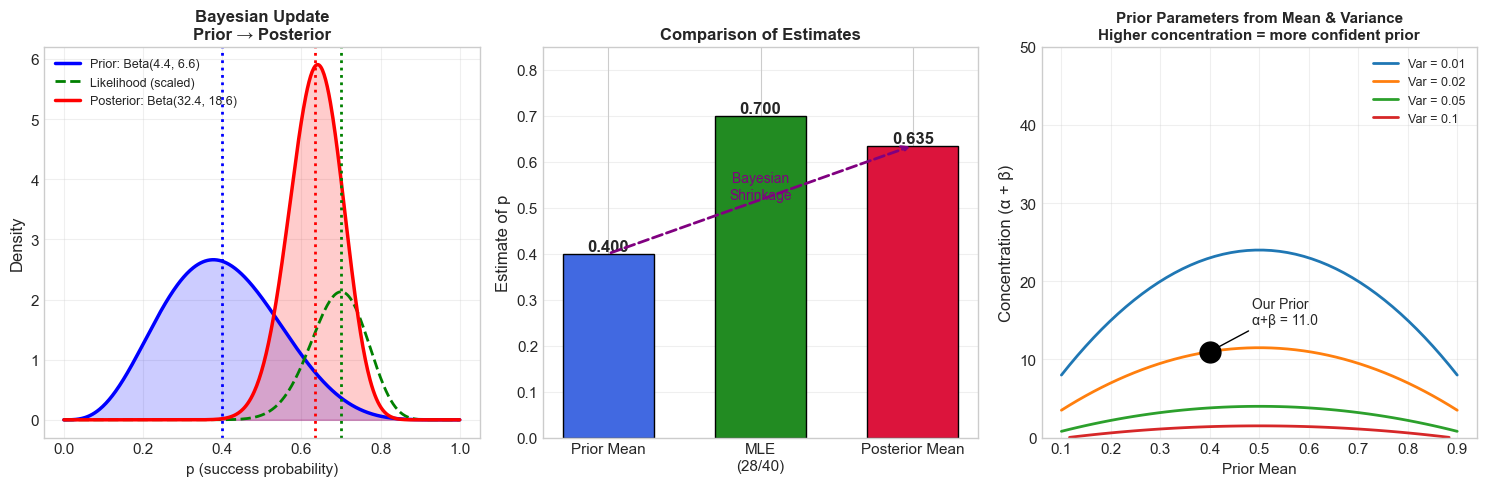


📊 Key Insights:
   • Prior mean = 0.40, Posterior mean = 0.64
   • MLE = 0.70 (pure data estimate)
   • Posterior is between prior and MLE (Bayesian shrinkage)
   • With n=40 observations, data dominates the posterior
   • Answer: Posterior Mean = 0.64


In [36]:
# Visualization: Q11 - Beta-Binomial Update with Mean/Variance Prior
# ===================================================================

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

p_range_q11 = np.linspace(0.001, 0.999, 500)

# Prior and Posterior parameters
alpha_prior_q11 = 4.4
beta_prior_q11 = 6.6
alpha_post_q11 = 32.4
beta_post_q11 = 18.6

# Panel 1: Prior, Likelihood, and Posterior
ax1 = axes[0]

# Prior
prior_pdf_q11 = stats.beta.pdf(p_range_q11, alpha_prior_q11, beta_prior_q11)
ax1.plot(p_range_q11, prior_pdf_q11, 'b-', linewidth=2.5, label=f'Prior: Beta({alpha_prior_q11}, {beta_prior_q11})')
ax1.fill_between(p_range_q11, prior_pdf_q11, alpha=0.2, color='blue')

# Likelihood (scaled for visualization)
likelihood_q11 = p_range_q11**28 * (1-p_range_q11)**12
likelihood_q11_scaled = likelihood_q11 / likelihood_q11.max() * prior_pdf_q11.max() * 0.8
ax1.plot(p_range_q11, likelihood_q11_scaled, 'g--', linewidth=2, label='Likelihood (scaled)')

# Posterior
posterior_pdf_q11 = stats.beta.pdf(p_range_q11, alpha_post_q11, beta_post_q11)
ax1.plot(p_range_q11, posterior_pdf_q11, 'r-', linewidth=2.5, label=f'Posterior: Beta({alpha_post_q11}, {beta_post_q11})')
ax1.fill_between(p_range_q11, posterior_pdf_q11, alpha=0.2, color='red')

# Mark means
prior_mean_viz_q11 = alpha_prior_q11 / (alpha_prior_q11 + beta_prior_q11)
posterior_mean_viz_q11 = alpha_post_q11 / (alpha_post_q11 + beta_post_q11)
mle_q11 = 28/40

ax1.axvline(x=prior_mean_viz_q11, color='blue', linestyle=':', linewidth=2)
ax1.axvline(x=posterior_mean_viz_q11, color='red', linestyle=':', linewidth=2)
ax1.axvline(x=mle_q11, color='green', linestyle=':', linewidth=2)

ax1.set_xlabel('p (success probability)', fontsize=11)
ax1.set_ylabel('Density', fontsize=12)
ax1.set_title('Bayesian Update\nPrior → Posterior', fontsize=12, fontweight='bold')
ax1.legend(fontsize=9, loc='upper left')
ax1.grid(True, alpha=0.3)

# Panel 2: Comparison of estimates
ax2 = axes[1]

estimates_q11 = ['Prior Mean', 'MLE\n(28/40)', 'Posterior Mean']
values_q11 = [prior_mean_viz_q11, mle_q11, posterior_mean_viz_q11]
colors_q11 = ['royalblue', 'forestgreen', 'crimson']

bars_q11 = ax2.bar(estimates_q11, values_q11, color=colors_q11, edgecolor='black', width=0.6)
ax2.bar_label(bars_q11, fmt='%.3f', fontsize=12, fontweight='bold')

ax2.set_ylabel('Estimate of p', fontsize=12)
ax2.set_title('Comparison of Estimates', fontsize=12, fontweight='bold')
ax2.set_ylim([0, 0.85])
ax2.grid(True, alpha=0.3, axis='y')

# Add annotation showing shrinkage
ax2.annotate('', xy=(2, posterior_mean_viz_q11), xytext=(0, prior_mean_viz_q11),
            arrowprops=dict(arrowstyle='->', color='purple', lw=2, ls='--'))
ax2.text(1, 0.52, 'Bayesian\nShrinkage', ha='center', fontsize=10, color='purple')

# Panel 3: How prior mean/variance determine α and β
ax3 = axes[2]

# Show relationship between mean, variance and α, β
mean_range = np.linspace(0.1, 0.9, 50)
var_values = [0.01, 0.02, 0.05, 0.1]

for var in var_values:
    # For each mean and variance, compute α+β (concentration)
    # var = mean*(1-mean)/(α+β+1)
    # α+β = mean*(1-mean)/var - 1
    concentration = mean_range * (1 - mean_range) / var - 1
    valid = concentration > 0
    ax3.plot(mean_range[valid], concentration[valid], linewidth=2, 
             label=f'Var = {var}')

# Mark our prior
concentration_q11 = alpha_prior_q11 + beta_prior_q11
ax3.plot(prior_mean_viz_q11, concentration_q11, 'ko', markersize=15, zorder=5)
ax3.annotate(f'Our Prior\nα+β = {concentration_q11}', 
             (prior_mean_viz_q11, concentration_q11),
             textcoords="offset points", xytext=(30, 20), fontsize=10,
             arrowprops=dict(arrowstyle='->', color='black'))

ax3.set_xlabel('Prior Mean', fontsize=11)
ax3.set_ylabel('Concentration (α + β)', fontsize=12)
ax3.set_title('Prior Parameters from Mean & Variance\nHigher concentration = more confident prior', 
              fontsize=11, fontweight='bold')
ax3.legend(fontsize=9, loc='upper right')
ax3.grid(True, alpha=0.3)
ax3.set_ylim([0, 50])

plt.tight_layout()
plt.show()

print("\n📊 Key Insights:")
print(f"   • Prior mean = {prior_mean_viz_q11:.2f}, Posterior mean = {posterior_mean_viz_q11:.2f}")
print(f"   • MLE = {mle_q11:.2f} (pure data estimate)")
print(f"   • Posterior is between prior and MLE (Bayesian shrinkage)")
print(f"   • With n=40 observations, data dominates the posterior")
print(f"   • Answer: Posterior Mean = 0.64")

---

## Summary of Answers

| Question | Topic | Answer |
|----------|-------|--------|
| Q1 | Poisson Posterior Mode | **λ = 10** |
| Q2 | Normal-Normal (n=1) | **μ = 12.77** |
| Q3 | Exponential-Gamma | **Option 1: (n+1)/(μ + Σxᵢ)** |
| Q4 | Beta-Binomial | **p = 0.66** |
| Q5 | Normal-Normal (n=10) | **μ = 550.26 mm** |
| Q6 | MLE for Exponential | **λ̂ = 0.039** |
| Q7 | Bayesian with Uniform[0,1] Prior | **E[λ\|X] = 0.043** |
| Q8 | Poisson Posterior Mode (Discrete Prior) | **λ = 5** |
| Q9 | Gamma Prior Parameter Relationship | **Option (a) β = α/3.5** |
| Q10 | Beta-Geometric Posterior Mean | **Option A: (4β + 11)/(5β + 12)** |
| Q11 | Beta-Binomial (Mean/Var Prior) | **Posterior Mean = 0.64** |

---

## Key Formulas

### Bayes' Theorem
$$P(\theta|X) = \frac{P(X|\theta) \cdot P(\theta)}{P(X)}$$

### Normal-Normal Conjugate
$$\mu_{post} = \frac{\tau^2}{\tau^2 + \sigma^2/n} \cdot \bar{x} + \frac{\sigma^2/n}{\tau^2 + \sigma^2/n} \cdot \mu_0$$

### Beta-Binomial Conjugate
$$\text{Beta}(a, b) + \text{Binomial}(n, x) \rightarrow \text{Beta}(a+x, b+n-x)$$

### Beta-Geometric Conjugate
$$\text{Beta}(\alpha, \beta) + k \text{ successes}, m \text{ failures} \rightarrow \text{Beta}(\alpha+k, \beta+m)$$

### Gamma-Exponential Conjugate
$$\text{Gamma}(\alpha, \beta) + \text{Exp data} \rightarrow \text{Gamma}(\alpha+n, \beta+\sum x_i)$$

### MLE for Exponential Distribution
$$\hat{\lambda}_{MLE} = \frac{n}{\sum x_i} = \frac{1}{\bar{x}}$$

### Truncated Distribution Mean
For posterior truncated to $[a, b]$:
$$E[\lambda|X] = \frac{\int_a^b \lambda \cdot p(\lambda|X) d\lambda}{\int_a^b p(\lambda|X) d\lambda}$$

### Discrete Bayes (Posterior Mode)
$$P(\lambda_i|X) = \frac{P(X|\lambda_i) \cdot P(\lambda_i)}{\sum_j P(X|\lambda_j) \cdot P(\lambda_j)}$$
Mode = $\lambda_i$ with highest $P(\lambda_i|X)$

### Gamma Prior Mean and Variance
For $\lambda \sim \text{Gamma}(\alpha, \beta)$:
$$E[\lambda] = \frac{\alpha}{\beta}, \quad \text{Var}(\lambda) = \frac{\alpha}{\beta^2}$$

### Beta Prior Mean and Variance
For $p \sim \text{Beta}(\alpha, \beta)$:
$$E[p] = \frac{\alpha}{\alpha + \beta}, \quad \text{Var}(p) = \frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

---

**Course:** Statistics II (BSMA1002)  
**Week:** 10 - Bayesian Inference  
**Last Updated:** December 3, 2025